# DATA VISUALIZATION

In [76]:
import pandas as pd
df = pd.read_csv('aus.csv')
df.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8         No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3         No   
2       1007.6       1008.7       NaN       2.0     21.0     23.2         No   
3       1017.6       1012.8       NaN       NaN     18.1     26.5         No   
4       1010.8       1006.0       7.0       8.0     17.8     29.7         No   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 23 columns]

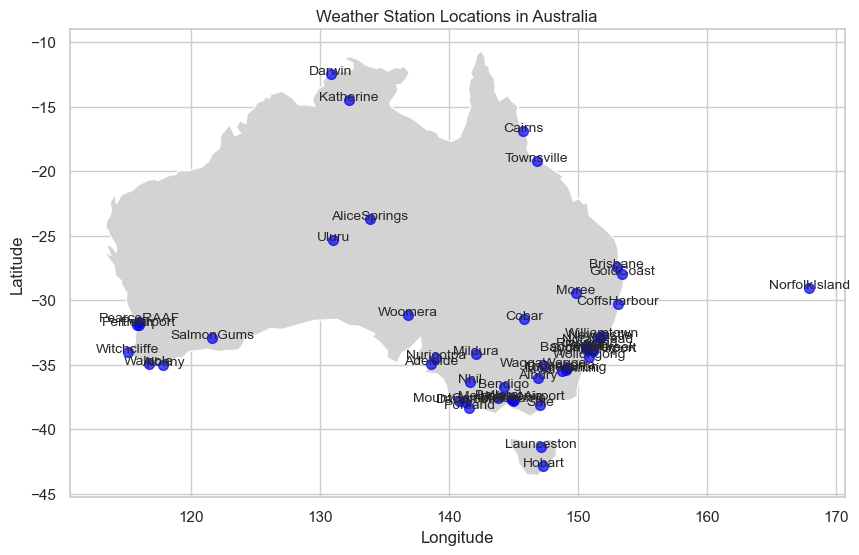

In [77]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the world map shapefile provided by geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Filter the world map to include only Australia
australia = world[world.name == 'Australia']

# Define the location coordinates
location_coordinates = {
    'Albury': (-36.0737, 146.9135),
    'BadgerysCreek': (-33.8799, 150.7525),
    'Cobar': (-31.4980, 145.8340),
    'CoffsHarbour': (-30.2960, 153.1150),
    'Moree': (-29.4644, 149.8415),
    'Newcastle': (-32.9169, 151.7500),
    'NorahHead': (-33.2831, 151.5675),
    'NorfolkIsland': (-29.0408, 167.9547),
    'Penrith': (-33.7526, 150.6941),
    'Richmond': (-33.6000, 150.7500),
    'Sydney': (-33.8688, 151.2093),
    'SydneyAirport': (-33.9461, 151.1772),
    'WaggaWagga': (-35.1150, 147.3677),
    'Williamtown': (-32.8150, 151.8433),
    'Wollongong': (-34.4278, 150.8931),
    'Canberra': (-35.2820, 149.1287),
    'Tuggeranong': (-35.4232, 149.0860),
    'MountGinini': (-35.5294, 148.7727),
    'Ballarat': (-37.5622, 143.8503),
    'Bendigo': (-36.7589, 144.2836),
    'Sale': (-38.1119, 147.0634),
    'MelbourneAirport': (-37.6705, 144.8322),
    'Melbourne': (-37.8136, 144.9631),
    'Mildura': (-34.2083, 142.1244),
    'Nhil': (-36.3328, 141.6502),
    'Portland': (-38.3510, 141.6056),
    'Watsonia': (-37.7117, 145.0835),
    'Dartmoor': (-37.9225, 141.2765),
    'Brisbane': (-27.4698, 153.0251),
    'Cairns': (-16.9186, 145.7781),
    'GoldCoast': (-28.0167, 153.4000),
    'Townsville': (-19.2580, 146.8169),
    'Adelaide': (-34.9285, 138.6007),
    'MountGambier': (-37.8284, 140.7815),
    'Nuriootpa': (-34.4694, 139.0057),
    'Woomera': (-31.1995, 136.8254),
    'Albany': (-35.0031, 117.8656),
    'Witchcliffe': (-34.0170, 115.1001),
    'PearceRAAF': (-31.6675, 116.0159),
    'PerthAirport': (-31.9405, 115.9660),
    'Perth': (-31.9505, 115.8605),
    'SalmonGums': (-32.9817, 121.6437),
    'Walpole': (-34.9773, 116.7311),
    'Hobart': (-42.8821, 147.3272),
    'Launceston': (-41.4298, 147.1401),
    'AliceSprings': (-23.7002, 133.8807),
    'Darwin': (-12.4634, 130.8456),
    'Katherine': (-14.4640, 132.2635),
    'Uluru': (-25.3444, 131.0369)
}

# Create a GeoDataFrame for the locations
geometry = gpd.points_from_xy([coord[1] for coord in location_coordinates.values()], [coord[0] for coord in location_coordinates.values()])
gdf = gpd.GeoDataFrame(location_coordinates.keys(), geometry=geometry, columns=['Location'])

# Plot the map
fig, ax = plt.subplots(figsize=(10, 10))
australia.plot(ax=ax, color='lightgrey')
gdf.plot(ax=ax, markersize=50, color='blue', alpha=0.7)

# Add labels for each location
for idx, row in gdf.iterrows():
    ax.annotate(row['Location'], (row['geometry'].x, row['geometry'].y), fontsize=10, ha='center')

# Set title and axis labels
ax.set_title('Weather Station Locations in Australia')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Show the plot
plt.show()

In [78]:
# Calculate summary statistics for rainfall by location
rainfall_by_location = df.groupby('Location')['Rainfall'].agg(['mean', 'median', 'std', 'count']).reset_index()
rainfall_by_location.sort_values(by='mean', ascending=False, inplace=True)

# Display summary statistics
rainfall_by_location.head()

Location      mean  median        std  count
8         Cairns  5.742035     0.0  18.280975   2988
13        Darwin  5.092452     0.0  16.450148   3193
11  CoffsHarbour  5.061497     0.0  17.444480   2953
14     GoldCoast  3.769396     0.0  13.054984   2980
47    Wollongong  3.594903     0.0  11.897181   2982

we can see that Cairns, Darwin, and CoffsHarbour have the highest average rainfall.

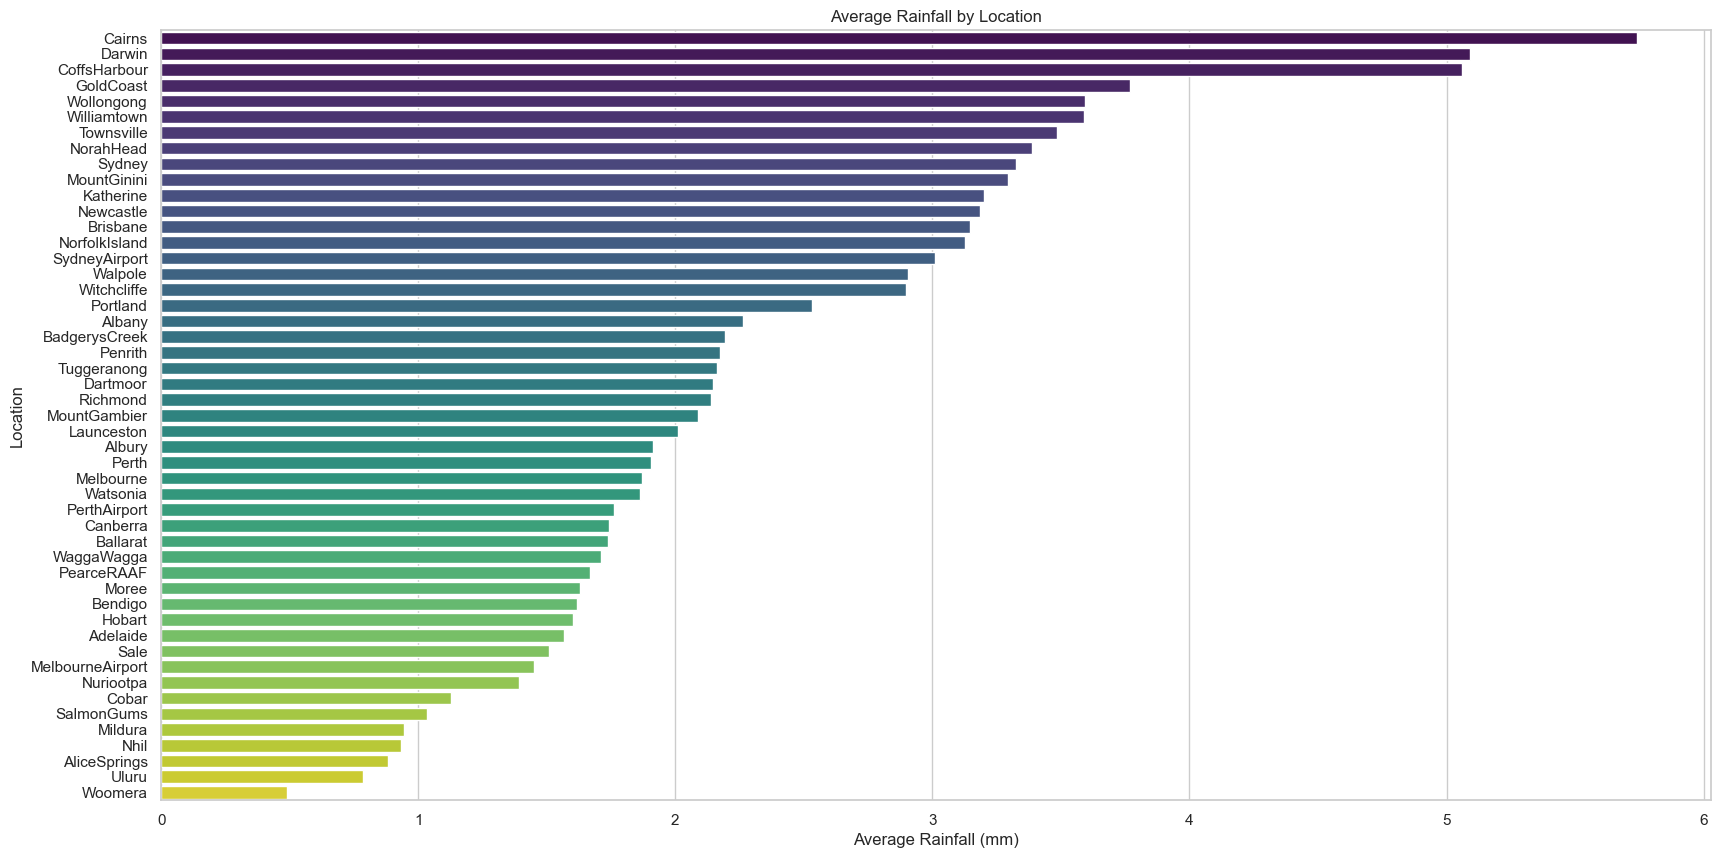

In [79]:
import seaborn as sns
# Set up the matplotlib figure
plt.figure(figsize=(20, 10))

# Create a bar chart for average rainfall by location
sns.barplot(x='mean', y='Location', data=rainfall_by_location, palette='viridis')

# Add labels and title
plt.xlabel('Average Rainfall (mm)')
plt.ylabel('Location')
plt.title('Average Rainfall by Location')

# Show the plot
plt.show()

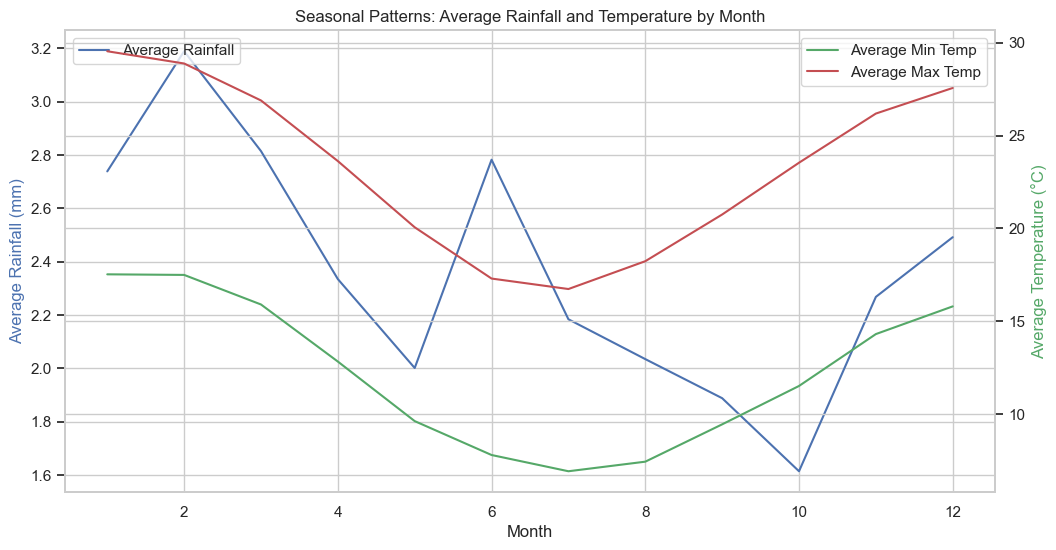

In [80]:
# Convert the 'Date' column to datetime format for easier manipulation
df['Date'] = pd.to_datetime(df['Date'])

# Extract the month and year from the date
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

# Calculate the average rainfall and temperature by month
monthly_avg = df.groupby('Month').agg({
    'Rainfall': 'mean',
    'MinTemp': 'mean',
    'MaxTemp': 'mean'
}).reset_index()

# Plotting
fig, ax1 = plt.subplots(figsize=(12, 6))

# Twin the axes for two different y-axes
ax2 = ax1.twinx()

# Plot data
sns.lineplot(x='Month', y='Rainfall', data=monthly_avg, ax=ax1, label='Average Rainfall', color='b')
sns.lineplot(x='Month', y='MinTemp', data=monthly_avg, ax=ax2, label='Average Min Temp', color='g')
sns.lineplot(x='Month', y='MaxTemp', data=monthly_avg, ax=ax2, label='Average Max Temp', color='r')

# Add labels and title
ax1.set_xlabel('Month')
ax1.set_ylabel('Average Rainfall (mm)', color='b')
ax2.set_ylabel('Average Temperature (°C)', color='g')
ax1.set_title('Seasonal Patterns: Average Rainfall and Temperature by Month')

# Add a legend
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Show the plot
plt.show()

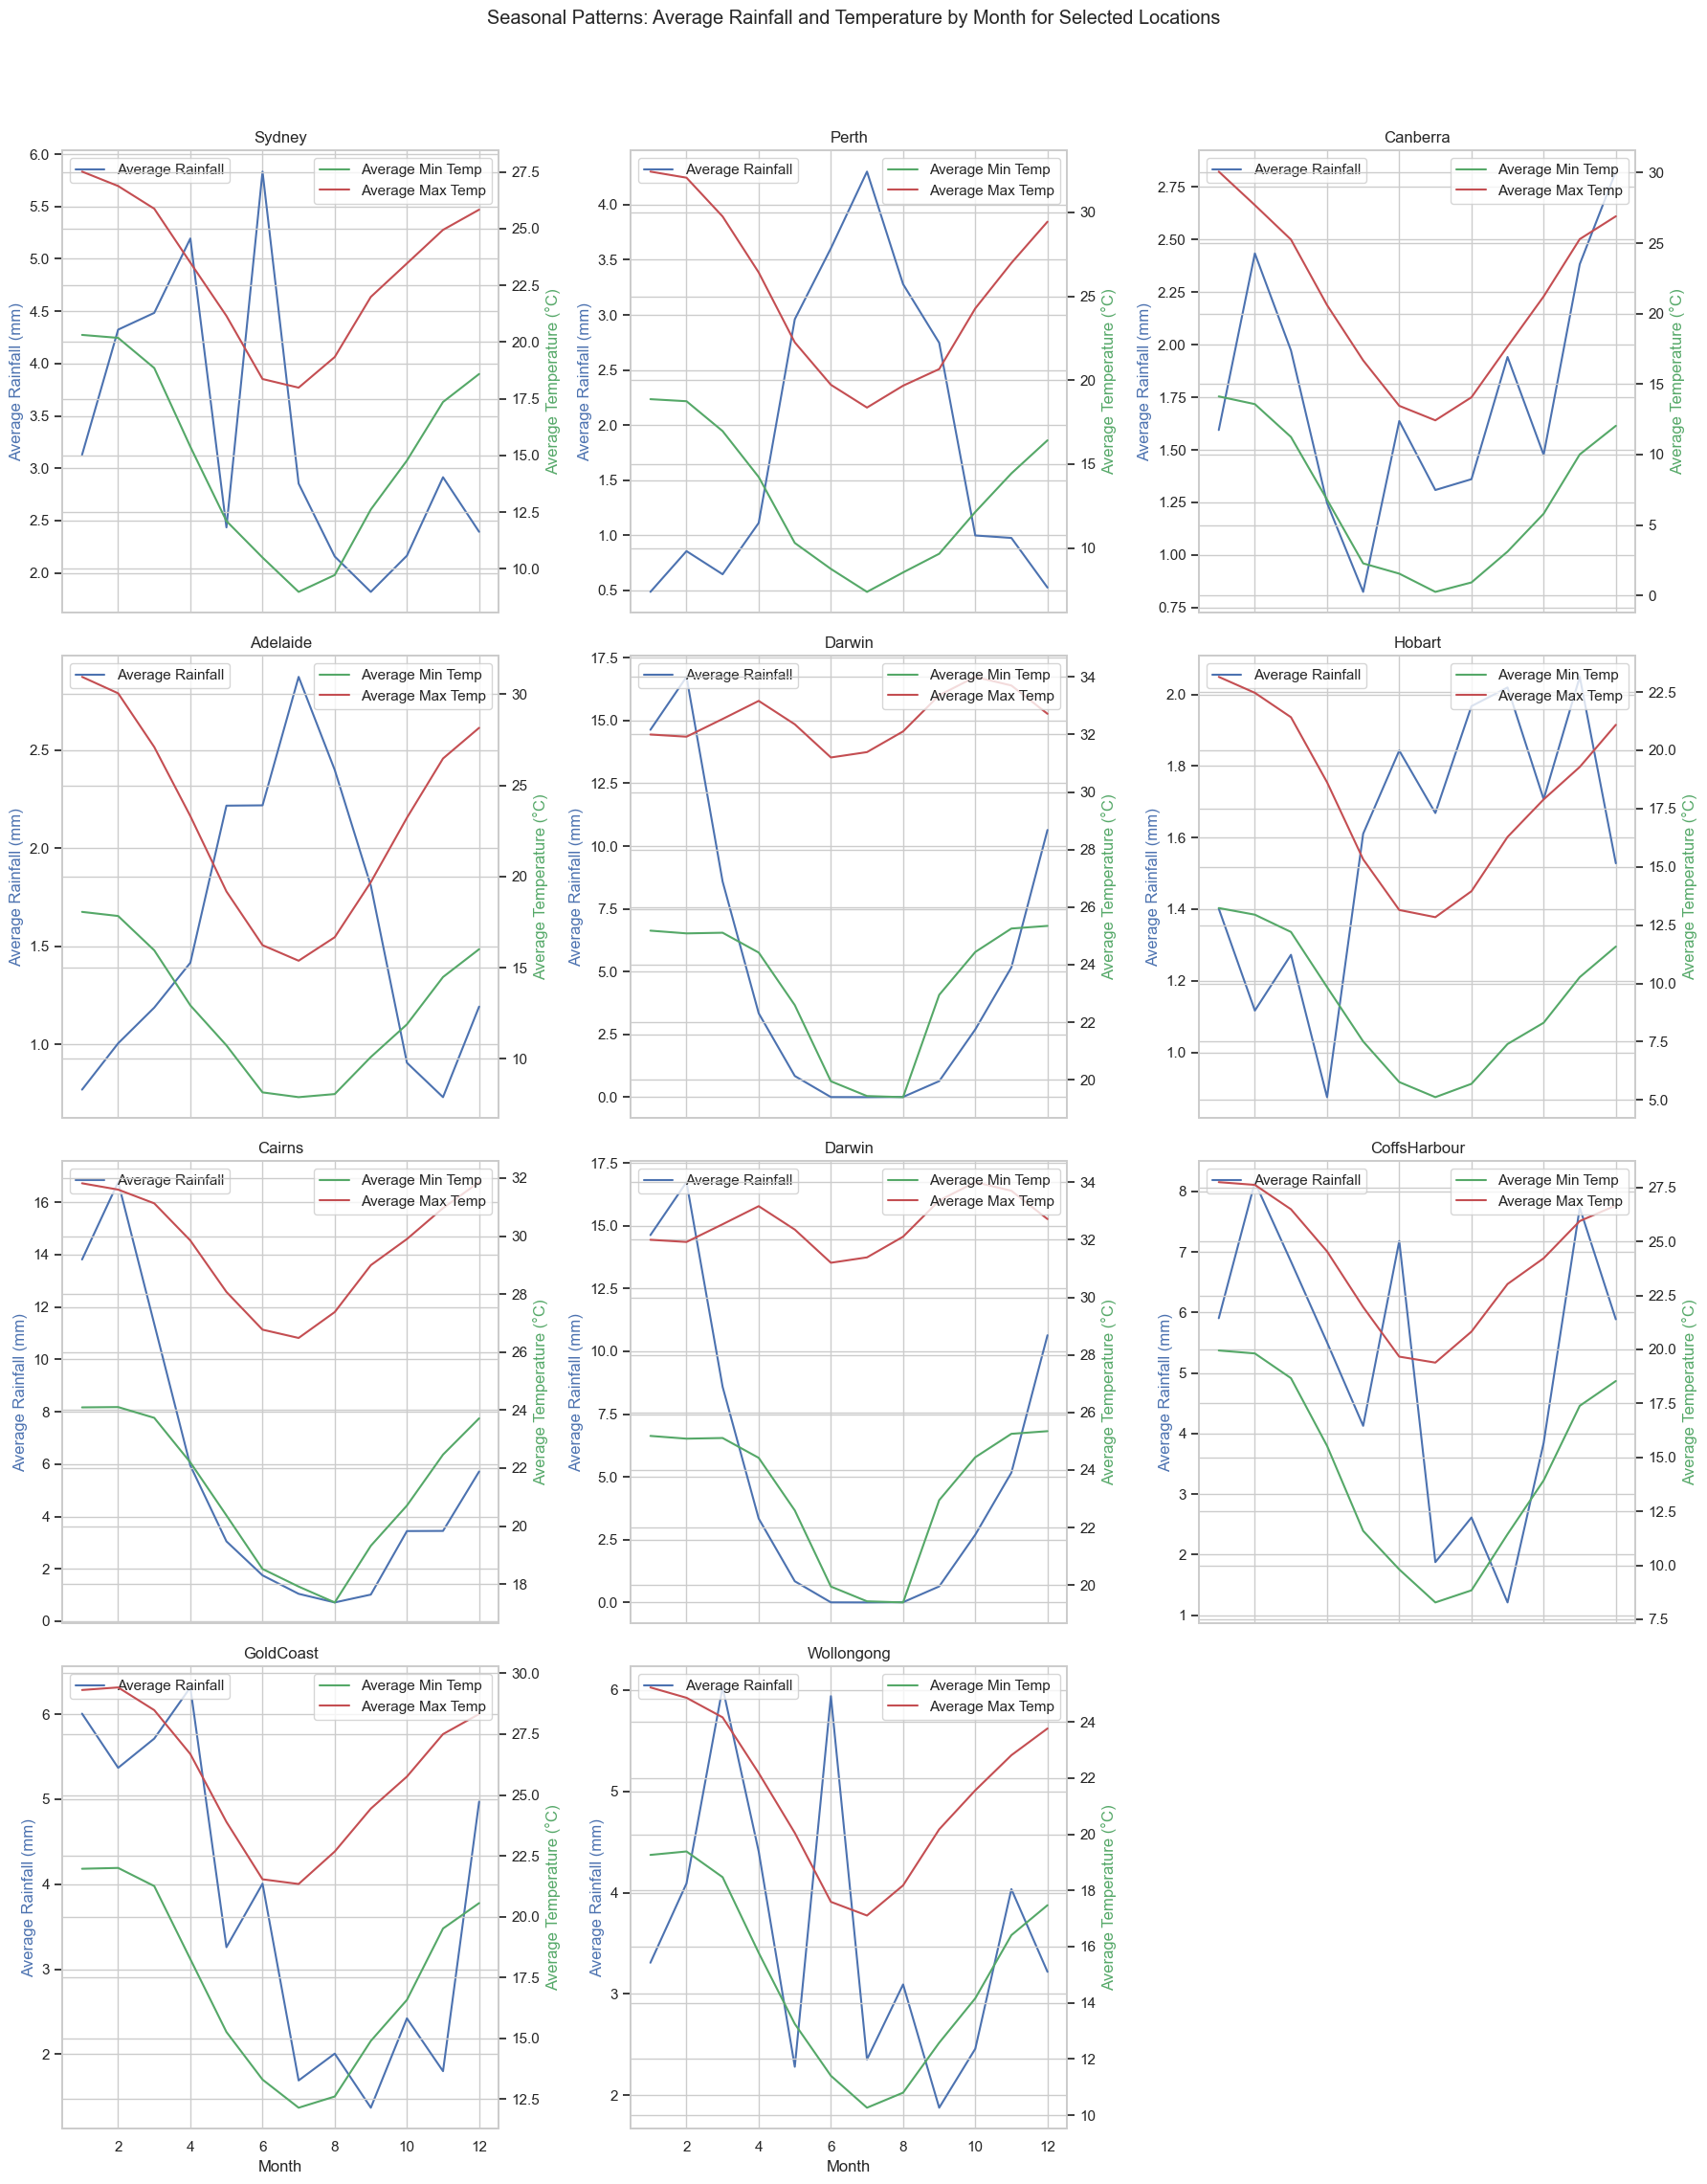

In [81]:
import math

# Update the list of major cities and top locations to consider for the new plot
major_cities = ['Sydney', 'Perth', 'Canberra', 'Adelaide', 'Darwin', 'Hobart']
top_locations = rainfall_by_location['Location'].head(5).tolist()
locations_to_consider = major_cities + top_locations

# Filter the dataset to only include these locations
df_filtered = df[df['Location'].isin(locations_to_consider)]

# Calculate the average rainfall and temperature by month for each selected location
monthly_avg_by_location = df_filtered.groupby(['Location', 'Month']).agg({
    'Rainfall': 'mean',
    'MinTemp': 'mean',
    'MaxTemp': 'mean'
}).reset_index()

# Determine the number of rows and columns for the subplots
num_locations = len(locations_to_consider)
num_cols = 3  # You can change this to fit your layout preference
num_rows = math.ceil(num_locations / num_cols)

# Plotting
fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, num_rows * 6), sharex=True, sharey=False)
fig.suptitle('Seasonal Patterns: Average Rainfall and Temperature by Month for Selected Locations')

# Flatten the axes for easier iteration
if axes.ndim > 1:
    axes = axes.flatten()

# Plot data for each location
for i, location in enumerate(locations_to_consider):
    ax1 = axes[i]
    ax2 = ax1.twinx()
    
    location_data = monthly_avg_by_location[monthly_avg_by_location['Location'] == location]
    
    sns.lineplot(x='Month', y='Rainfall', data=location_data, ax=ax1, label='Average Rainfall', color='b')
    sns.lineplot(x='Month', y='MinTemp', data=location_data, ax=ax2, label='Average Min Temp', color='g')
    sns.lineplot(x='Month', y='MaxTemp', data=location_data, ax=ax2, label='Average Max Temp', color='r')
    
    ax1.set_title(location)
    ax1.set_xlabel('Month')
    ax1.set_ylabel('Average Rainfall (mm)', color='b')
    ax2.set_ylabel('Average Temperature (°C)', color='g')
    
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')

# Remove empty subplots
for i in range(num_locations, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


<h3>Monthly Variability: Investigate how much the rainfall varies from month to month within each location.</h3>

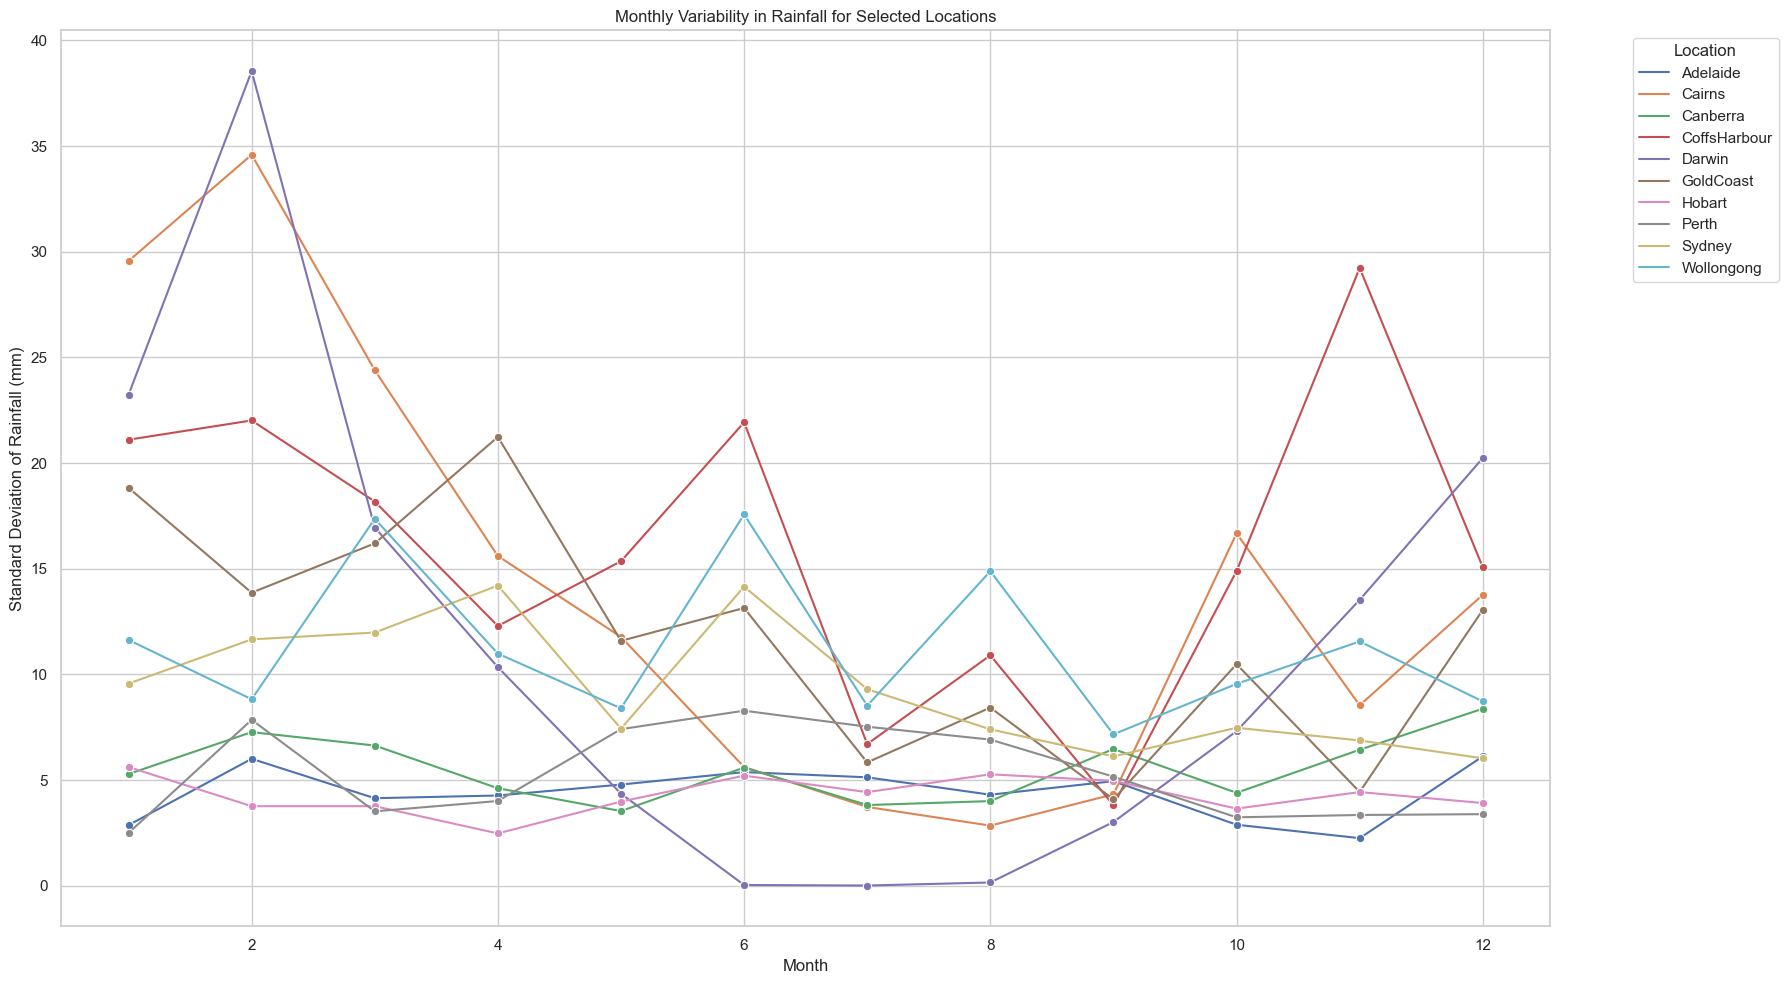

In [82]:
# Calculate the standard deviation of monthly rainfall for each selected location
monthly_variability = df_filtered.groupby(['Location', 'Month'])['Rainfall'].std().reset_index()

# Plotting
plt.figure(figsize=(18, 10))
sns.lineplot(x='Month', y='Rainfall', hue='Location', data=monthly_variability, marker='o')
plt.title('Monthly Variability in Rainfall for Selected Locations')
plt.xlabel('Month')
plt.ylabel('Standard Deviation of Rainfall (mm)')
plt.legend(title='Location', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


**Observations**

**Cairns and Darwin:** These locations exhibit higher variability, especially in the wetter months at the beginning of the year. This could indicate that they experience both very dry and very wet days during these months, making the rainfall more unpredictable.

**Other Cities:** Locations like Sydney, Perth, and Canberra show relatively lower variability, suggesting that rainfall might be more consistent throughout the year.

**Seasonal Patterns:** Some locations exhibit a seasonal pattern in their variability. For example, Cairns has increased variability at the start and end of the year.

**Yearly Trends:** Examine if there are any long-term trends in rainfall. Is it increasing or decreasing over the years

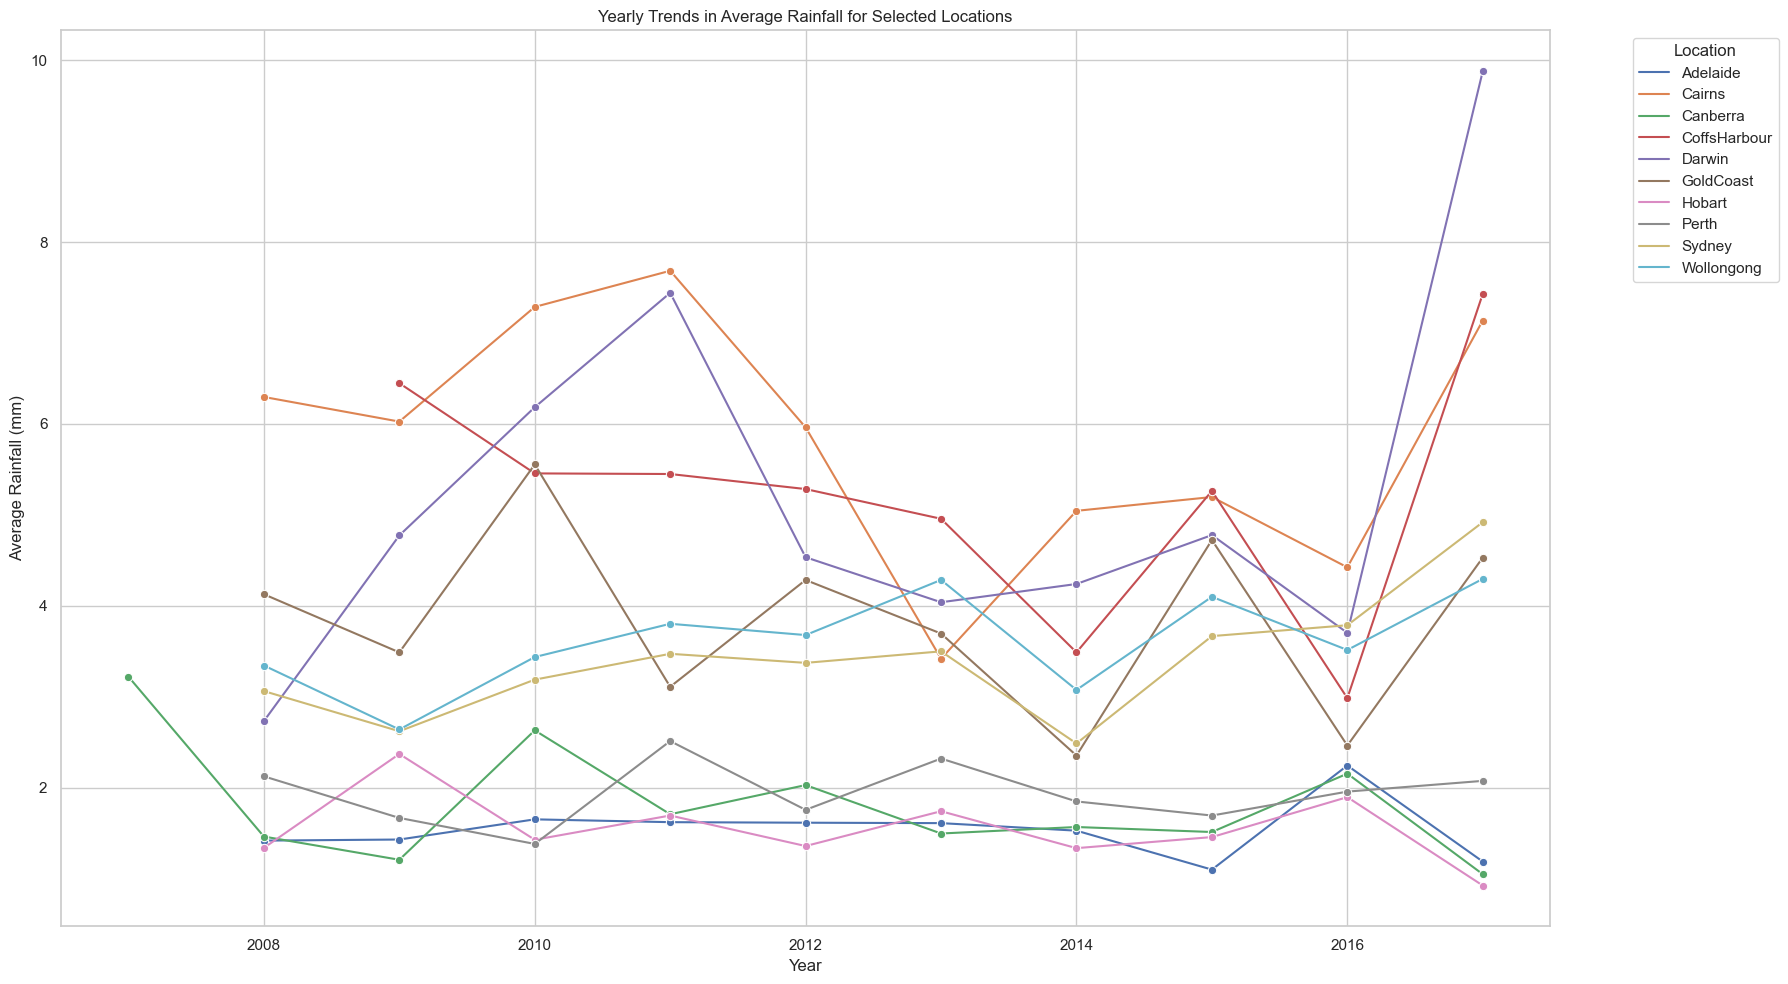

In [83]:
# Calculate the average rainfall by year for each selected location
yearly_avg_rainfall = df_filtered.groupby(['Location', 'Year'])['Rainfall'].mean().reset_index()

# Plotting
plt.figure(figsize=(18, 10))
sns.lineplot(x='Year', y='Rainfall', hue='Location', data=yearly_avg_rainfall, marker='o')
plt.title('Yearly Trends in Average Rainfall for Selected Locations')
plt.xlabel('Year')
plt.ylabel('Average Rainfall (mm)')
plt.legend(title='Location', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


**Observations**

**Variable Trends:** Different locations show different trends. For example, Cairns appears to have experienced some years with notably higher average rainfall, while other locations like Sydney and Perth seem to have more stable yearly averages.

**Short-Term Fluctuations:** There are fluctuations in the average rainfall for most locations, indicating that a single year's increase or decrease does not necessarily represent a long-term trend.

**Data Sparsity:** For some locations, the data is sparse in the earlier years, which could affect the reliability of the trend for those years.

<h3>Extreme Events: Identify and analyze the days or months with extreme rainfall events. How often do they happen, and is there a pattern</h3>

In [84]:
df_drop = df_filtered[df_filtered['Rainfall'] != 0]

# Calculate the 95th percentile of daily rainfall across all selected locations as the threshold for extreme events
threshold_95th = df_drop['Rainfall'].quantile(0.95)

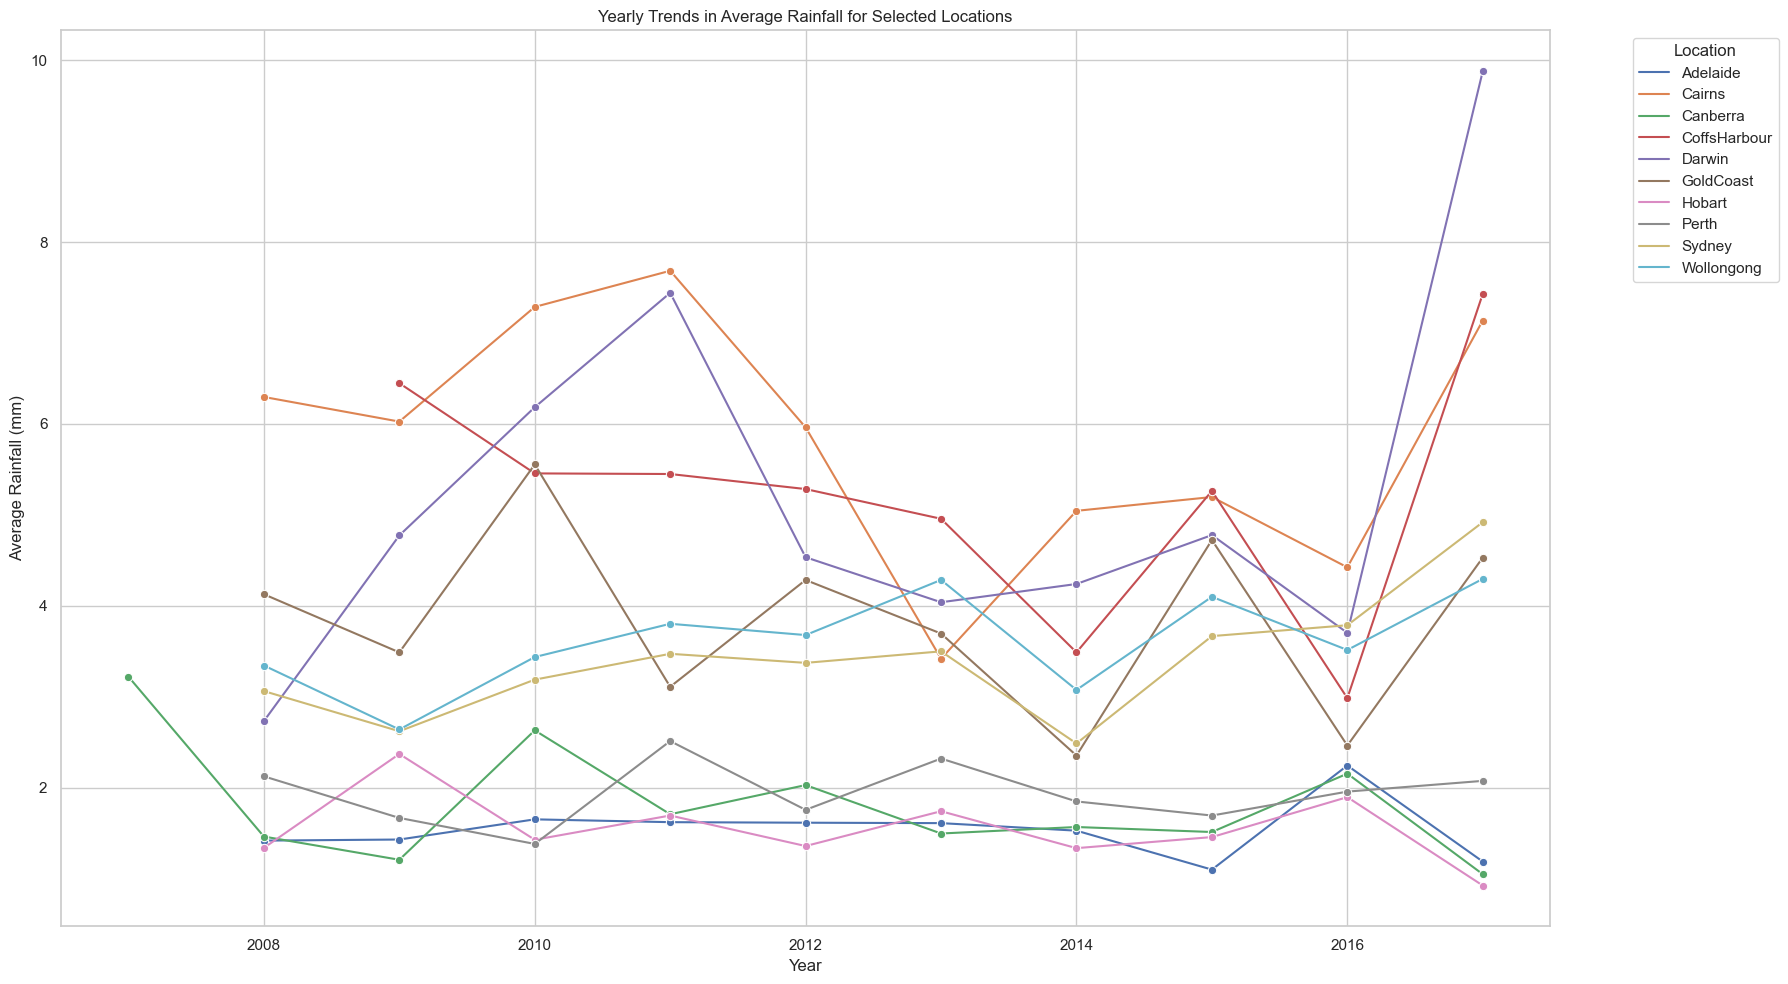

In [85]:
# Calculate the average rainfall by year for each selected location
yearly_avg_rainfall = df_filtered.groupby(['Location', 'Year'])['Rainfall'].mean().reset_index()

# Plotting
plt.figure(figsize=(18, 10))
sns.lineplot(x='Year', y='Rainfall', hue='Location', data=yearly_avg_rainfall, marker='o')
plt.title('Yearly Trends in Average Rainfall for Selected Locations')
plt.xlabel('Year')
plt.ylabel('Average Rainfall (mm)')
plt.legend(title='Location', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


**Observations**

**Variable Trends:** Different locations show different trends. For example, Cairns appears to have experienced some years with notably higher average rainfall, while other locations like Sydney and Perth seem to have more stable yearly averages.

**Short-Term Fluctuations:** There are fluctuations in the average rainfall for most locations, indicating that a single year's increase or decrease does not necessarily represent a long-term trend.

**Data Sparsity:** For some locations, the data is sparse in the earlier years, which could affect the reliability of the trend for those years.

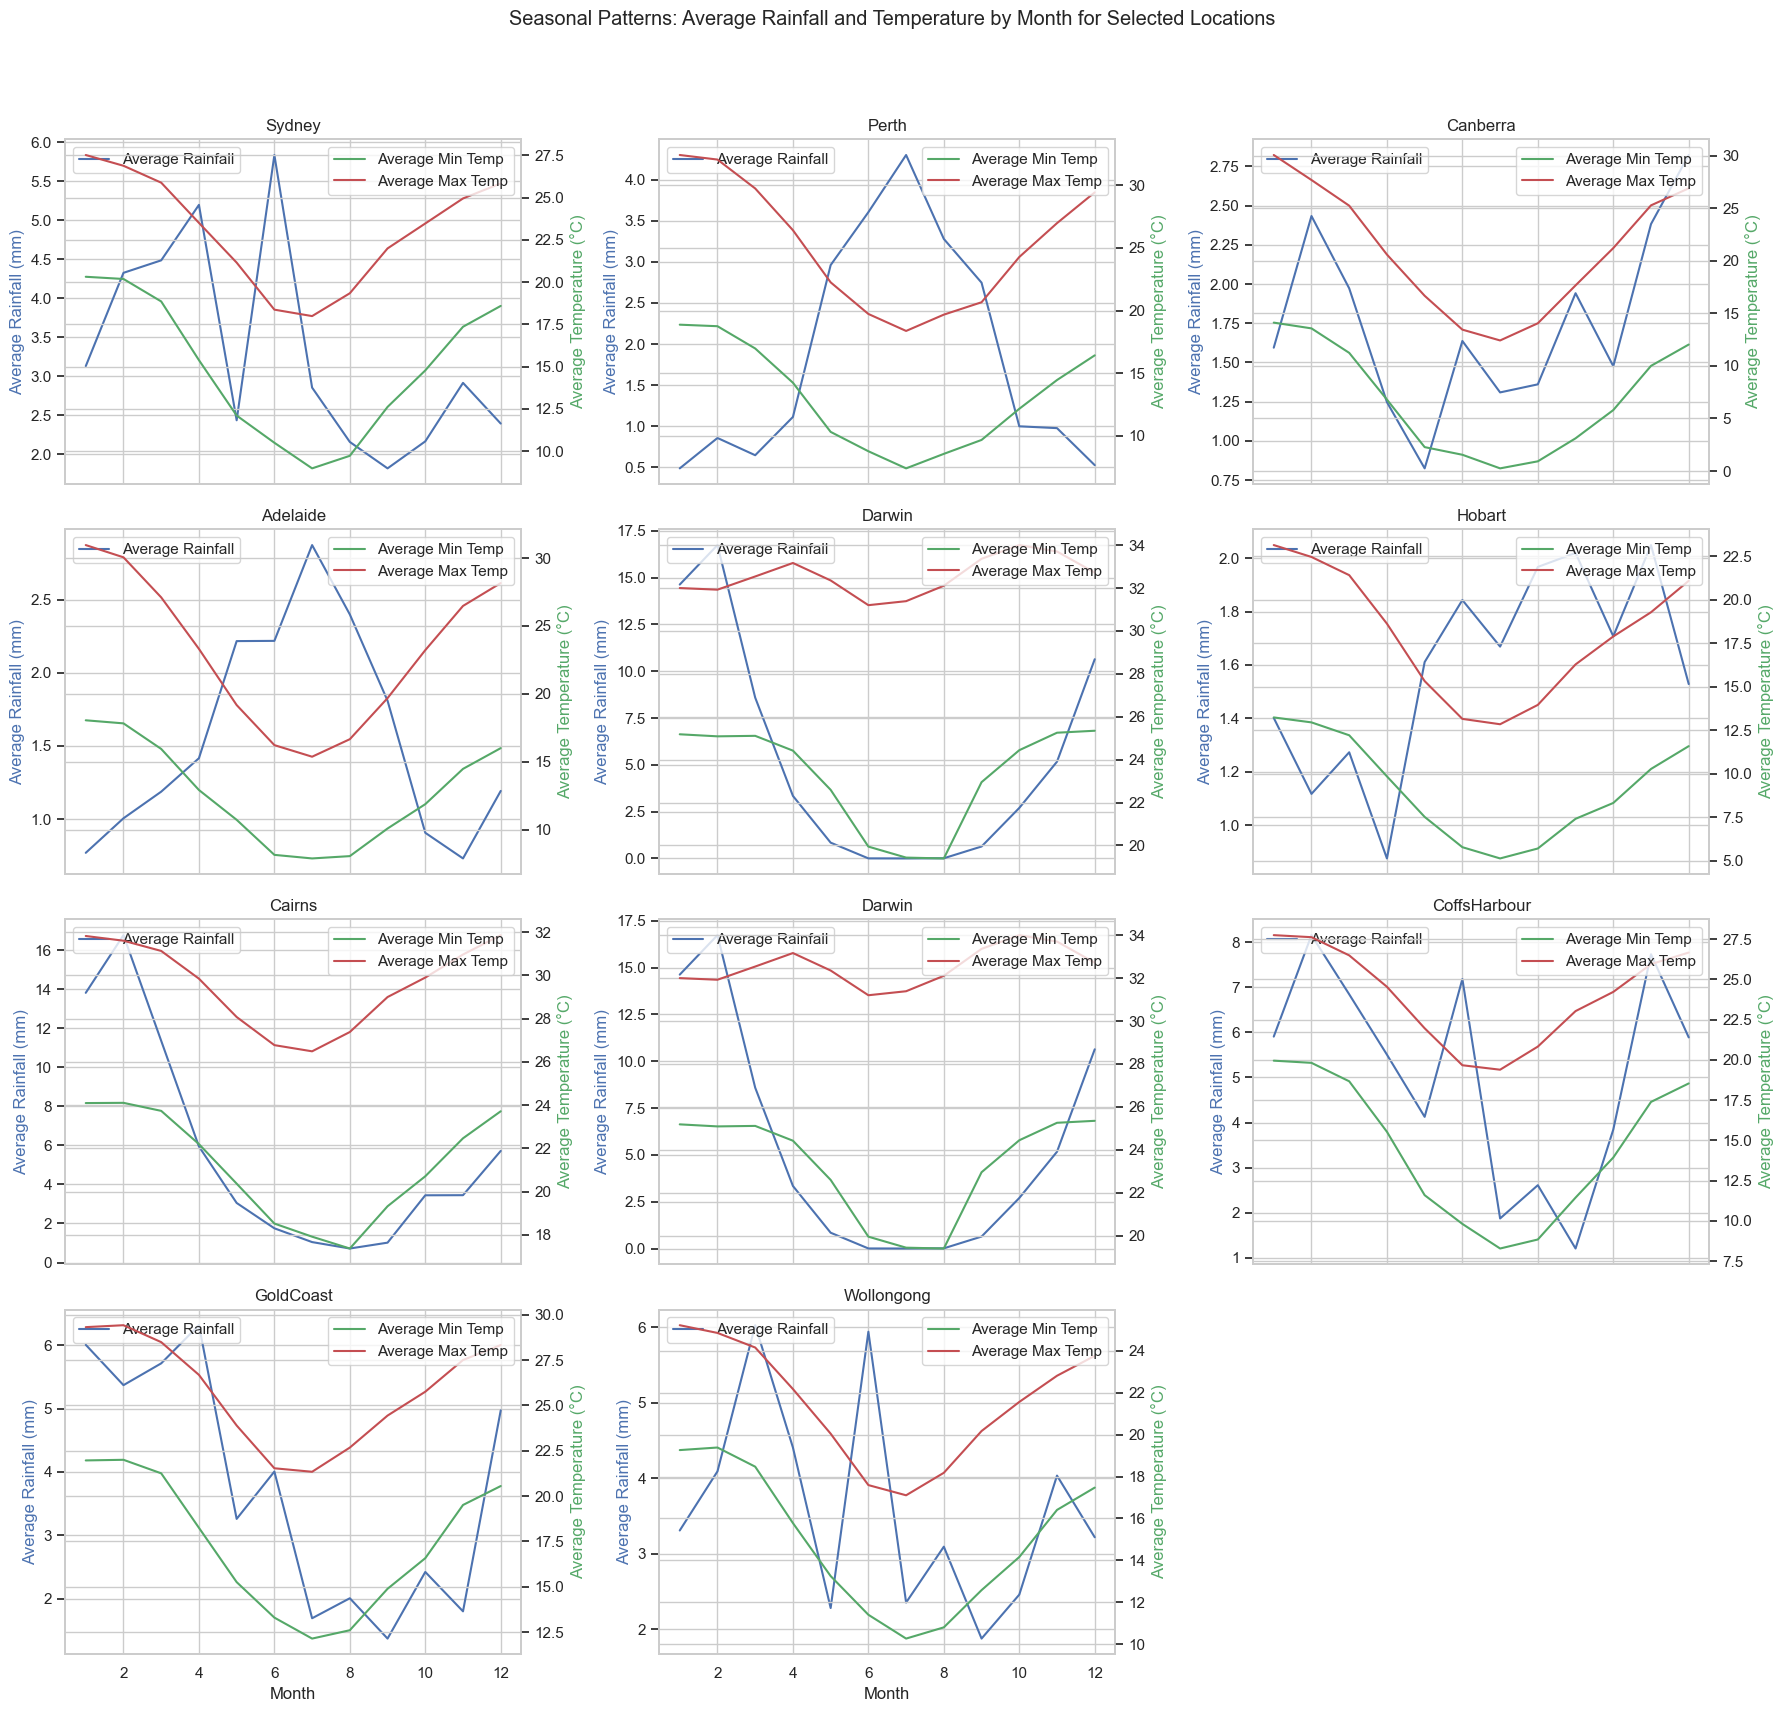

In [86]:
import math

# Determine the number of rows and columns for the subplots
num_locations = len(locations_to_consider)
num_cols = 3  # You can change this to fit your layout preference
num_rows = math.ceil(num_locations / num_cols)

# Plotting
fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 18), sharex=True, sharey=False)
fig.suptitle('Seasonal Patterns: Average Rainfall and Temperature by Month for Selected Locations')

# Flatten the axes for easier iteration
if axes.ndim > 1:
    axes = axes.flatten()

# Plot data for each location
for i, location in enumerate(locations_to_consider):
    ax1 = axes[i]
    ax2 = ax1.twinx()
    
    location_data = monthly_avg_by_location[monthly_avg_by_location['Location'] == location]
    
    sns.lineplot(x='Month', y='Rainfall', data=location_data, ax=ax1, label='Average Rainfall', color='b')
    sns.lineplot(x='Month', y='MinTemp', data=location_data, ax=ax2, label='Average Min Temp', color='g')
    sns.lineplot(x='Month', y='MaxTemp', data=location_data, ax=ax2, label='Average Max Temp', color='r')
    
    ax1.set_title(location)
    ax1.set_xlabel('Month')
    ax1.set_ylabel('Average Rainfall (mm)', color='b')
    ax2.set_ylabel('Average Temperature (°C)', color='g')
    
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')

# Remove empty subplots
for i in range(num_locations, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


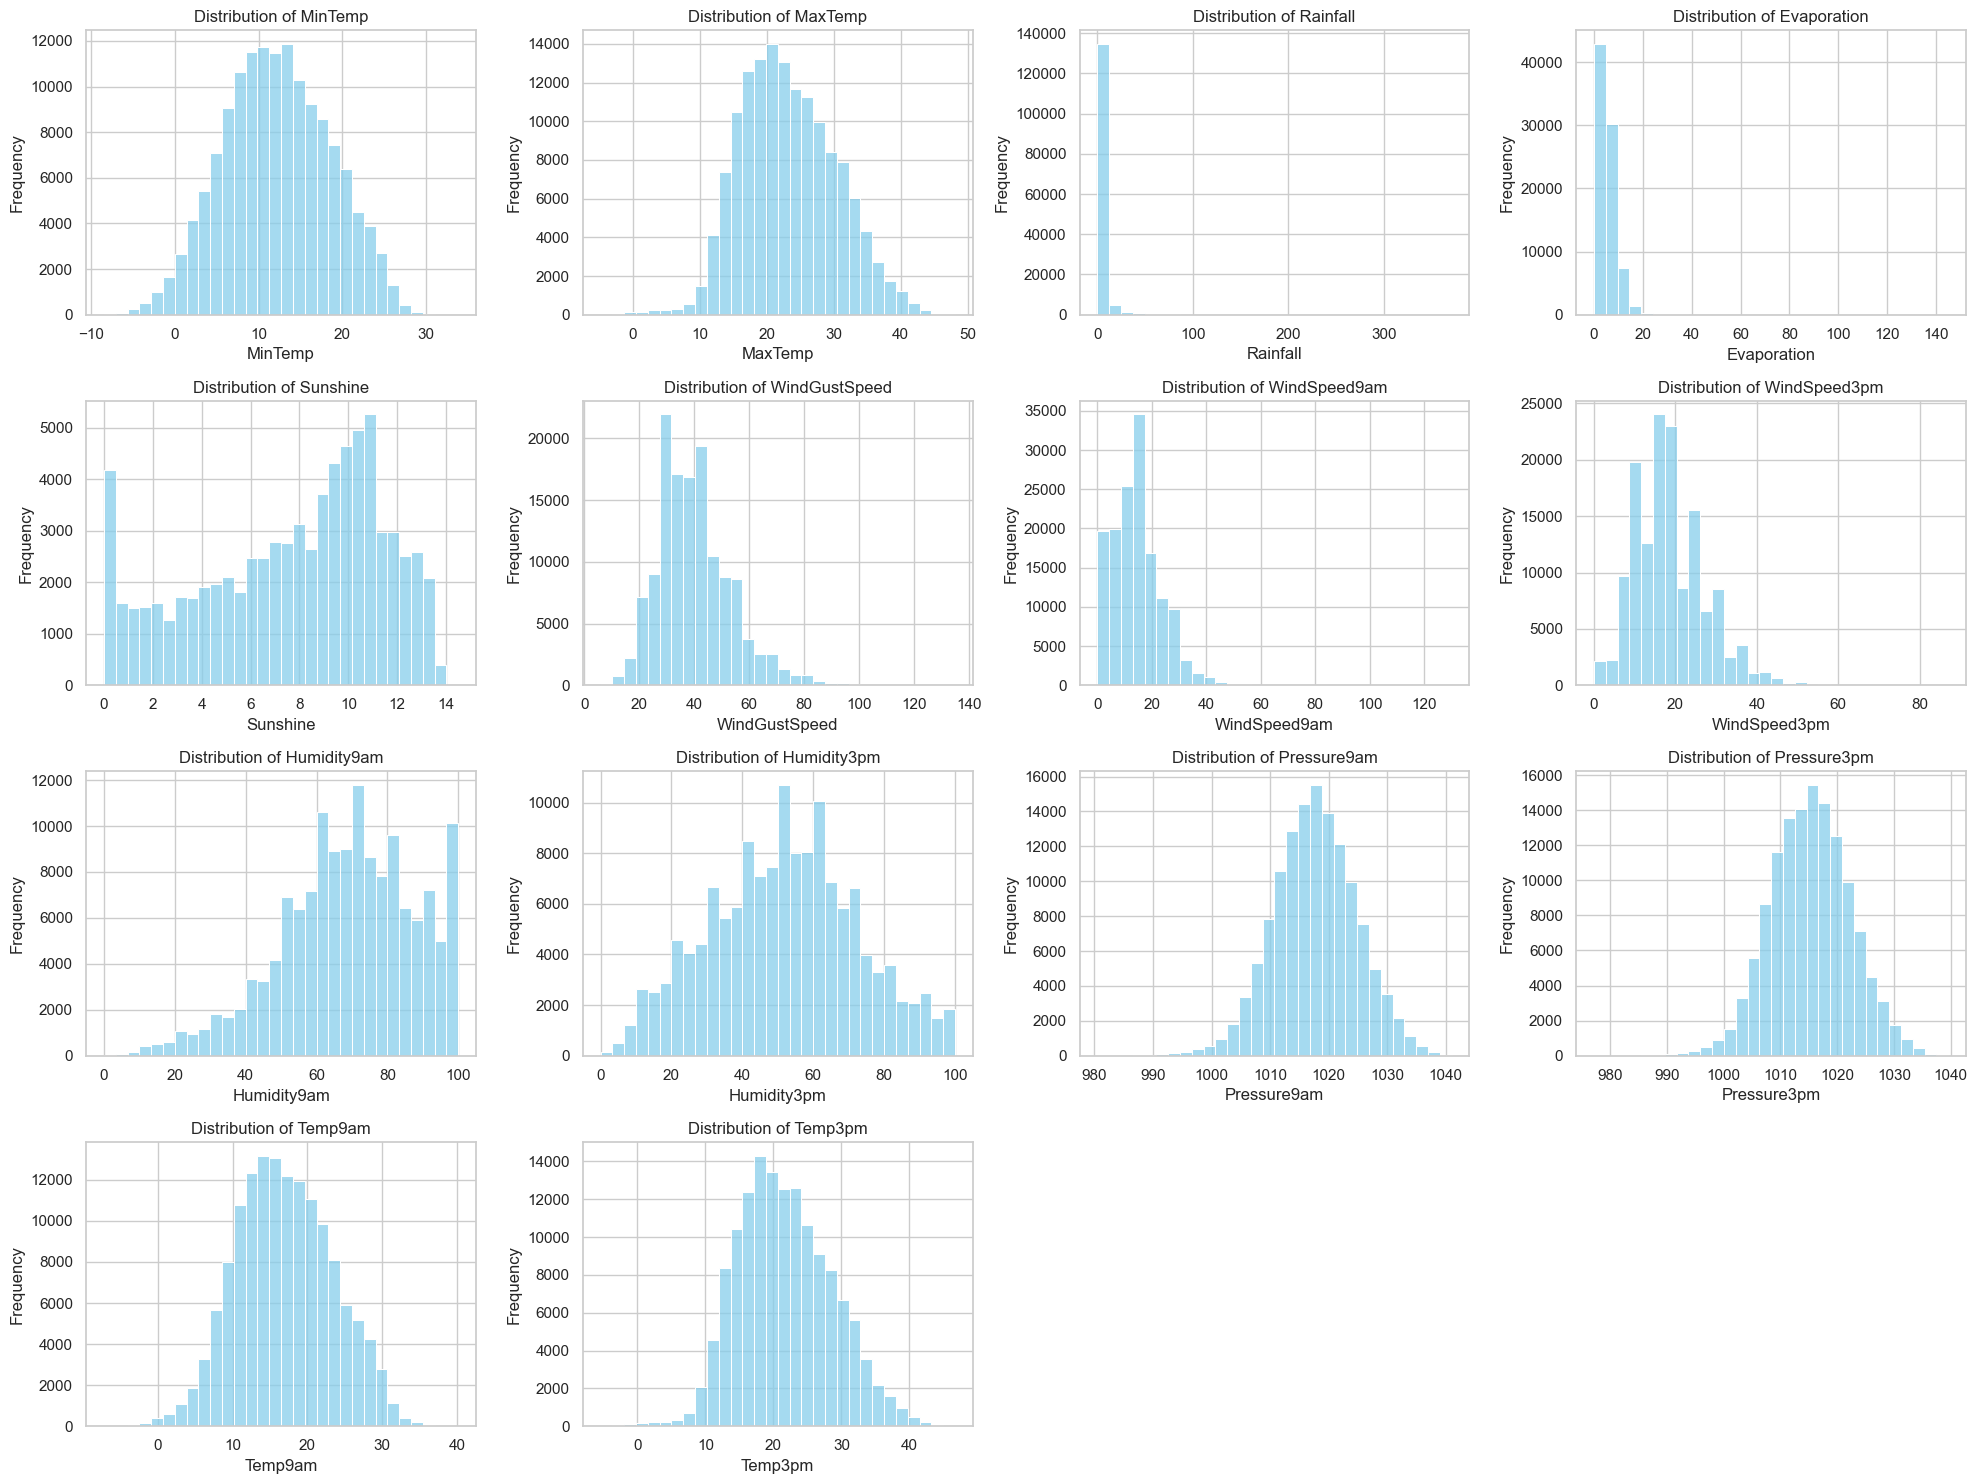

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for seaborn
sns.set(style="whitegrid")

# Initialize the figure
plt.figure(figsize=(20, 15))

# Create a list of numerical columns to visualize
numerical_columns = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 
                     'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 
                     'Humidity9am', 'Humidity3pm', 
                     'Pressure9am', 'Pressure3pm', 
                     'Temp9am', 'Temp3pm']

# Create subplots for each column
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(4, 4, i)
    sns.histplot(df[column], bins=30, kde=False, color='skyblue')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

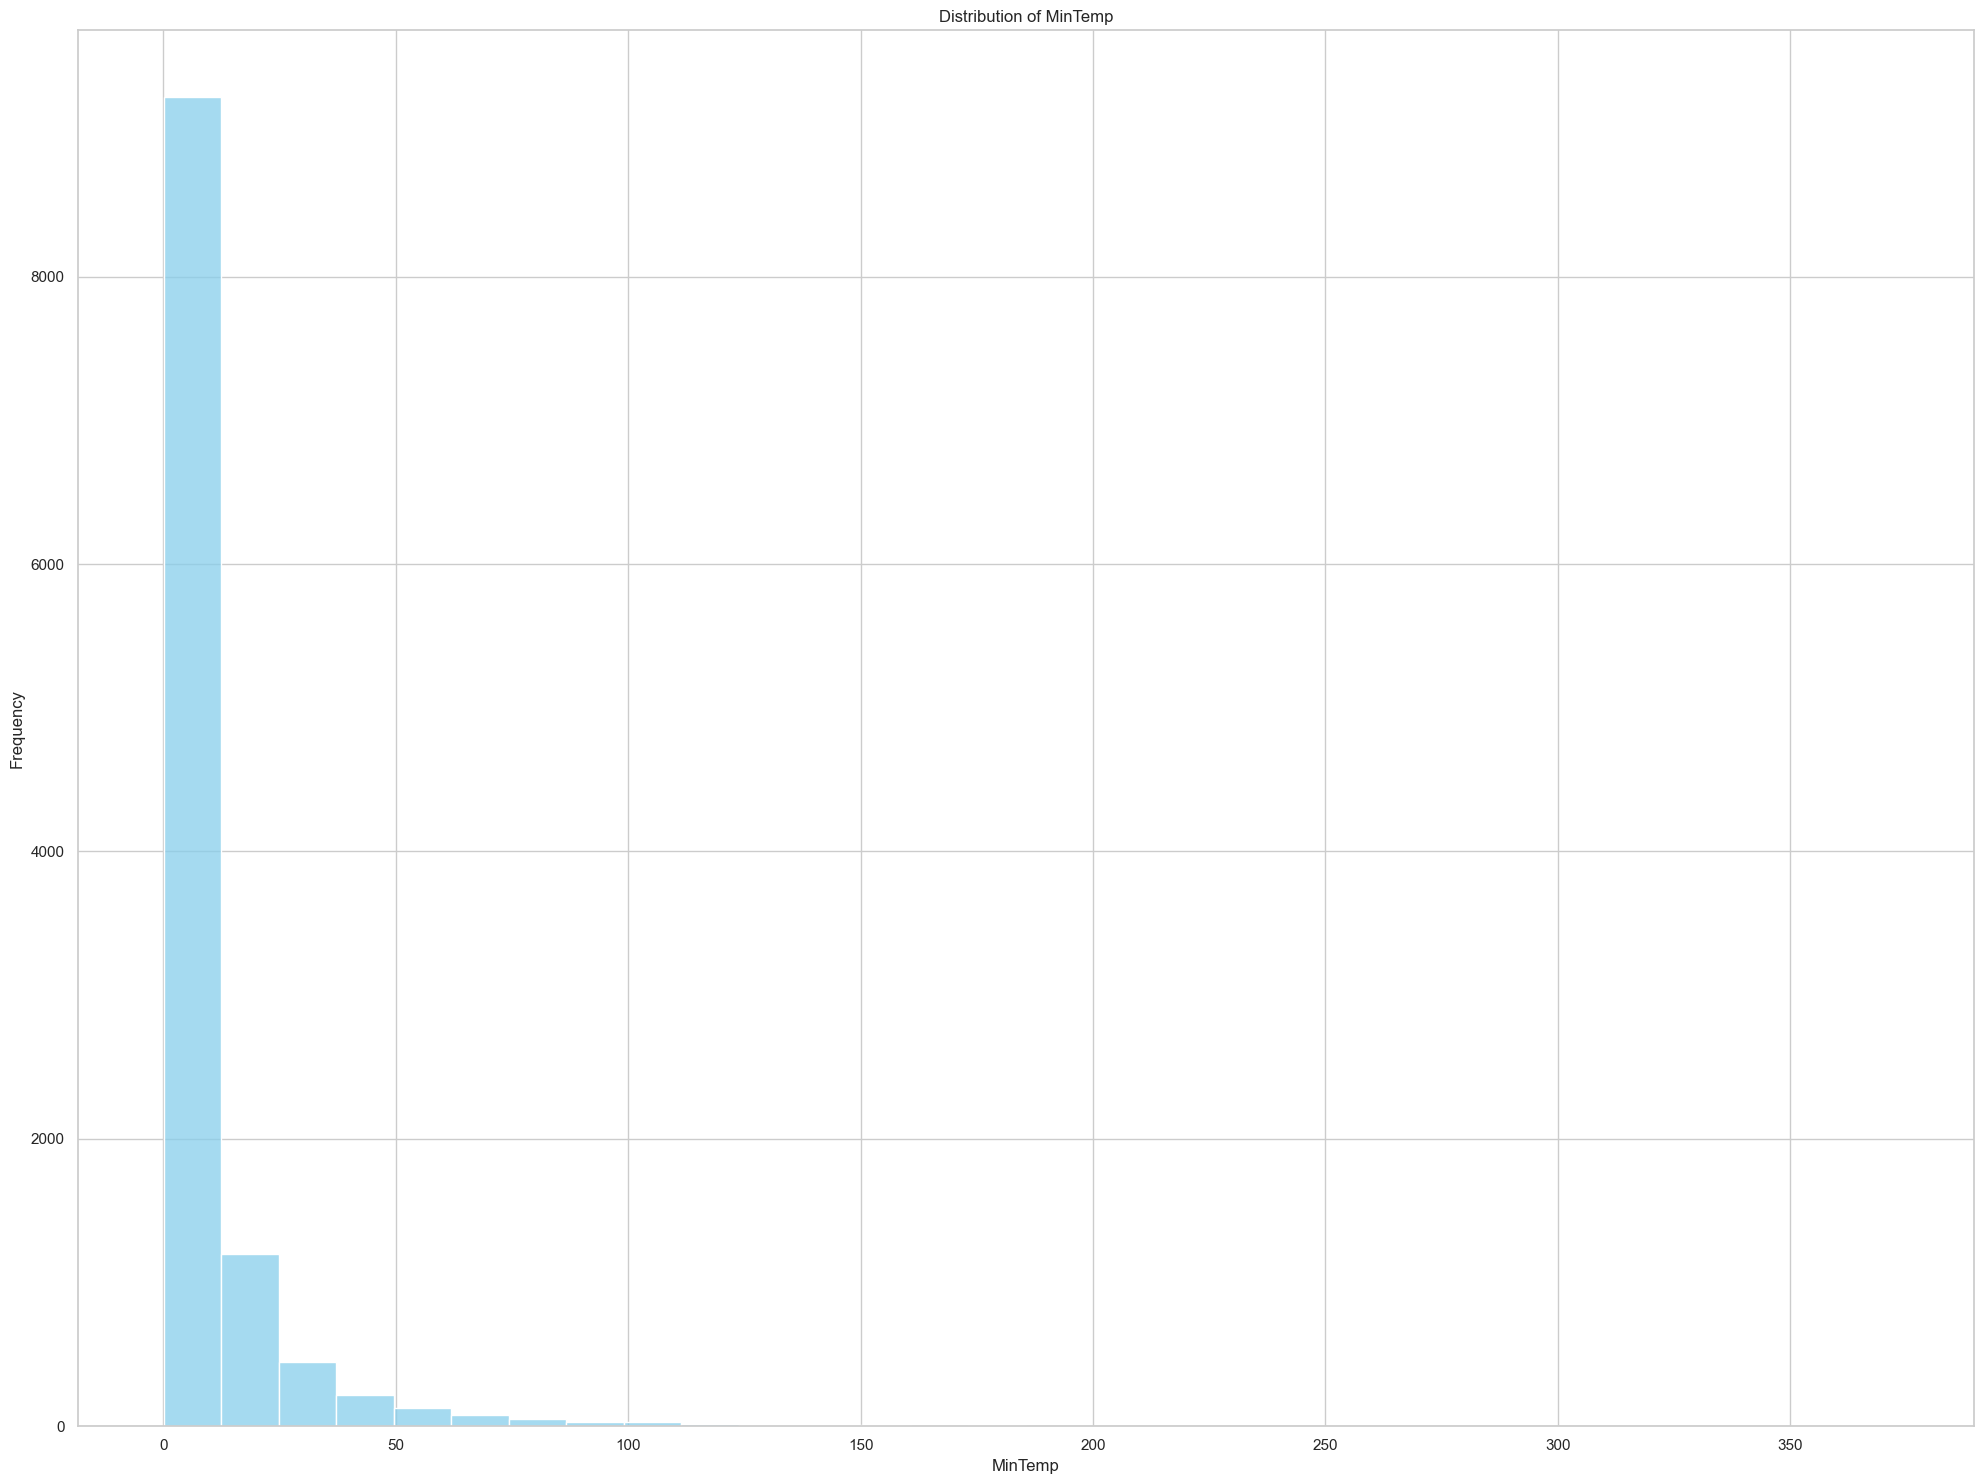

In [88]:
# Set style for seaborn
sns.set(style="whitegrid")

# Initialize the figure
plt.figure(figsize=(20, 15))

# Assuming numerical_columns contains only one column name, e.g., 'Rainfall'
column = numerical_columns[0]

plt.subplot(1, 1, 1)  # Create a single subplot
sns.histplot(df_drop['Rainfall'], bins=30, kde=False, color='skyblue')
plt.title(f'Distribution of Rainfall')
plt.xlabel(column)
plt.ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

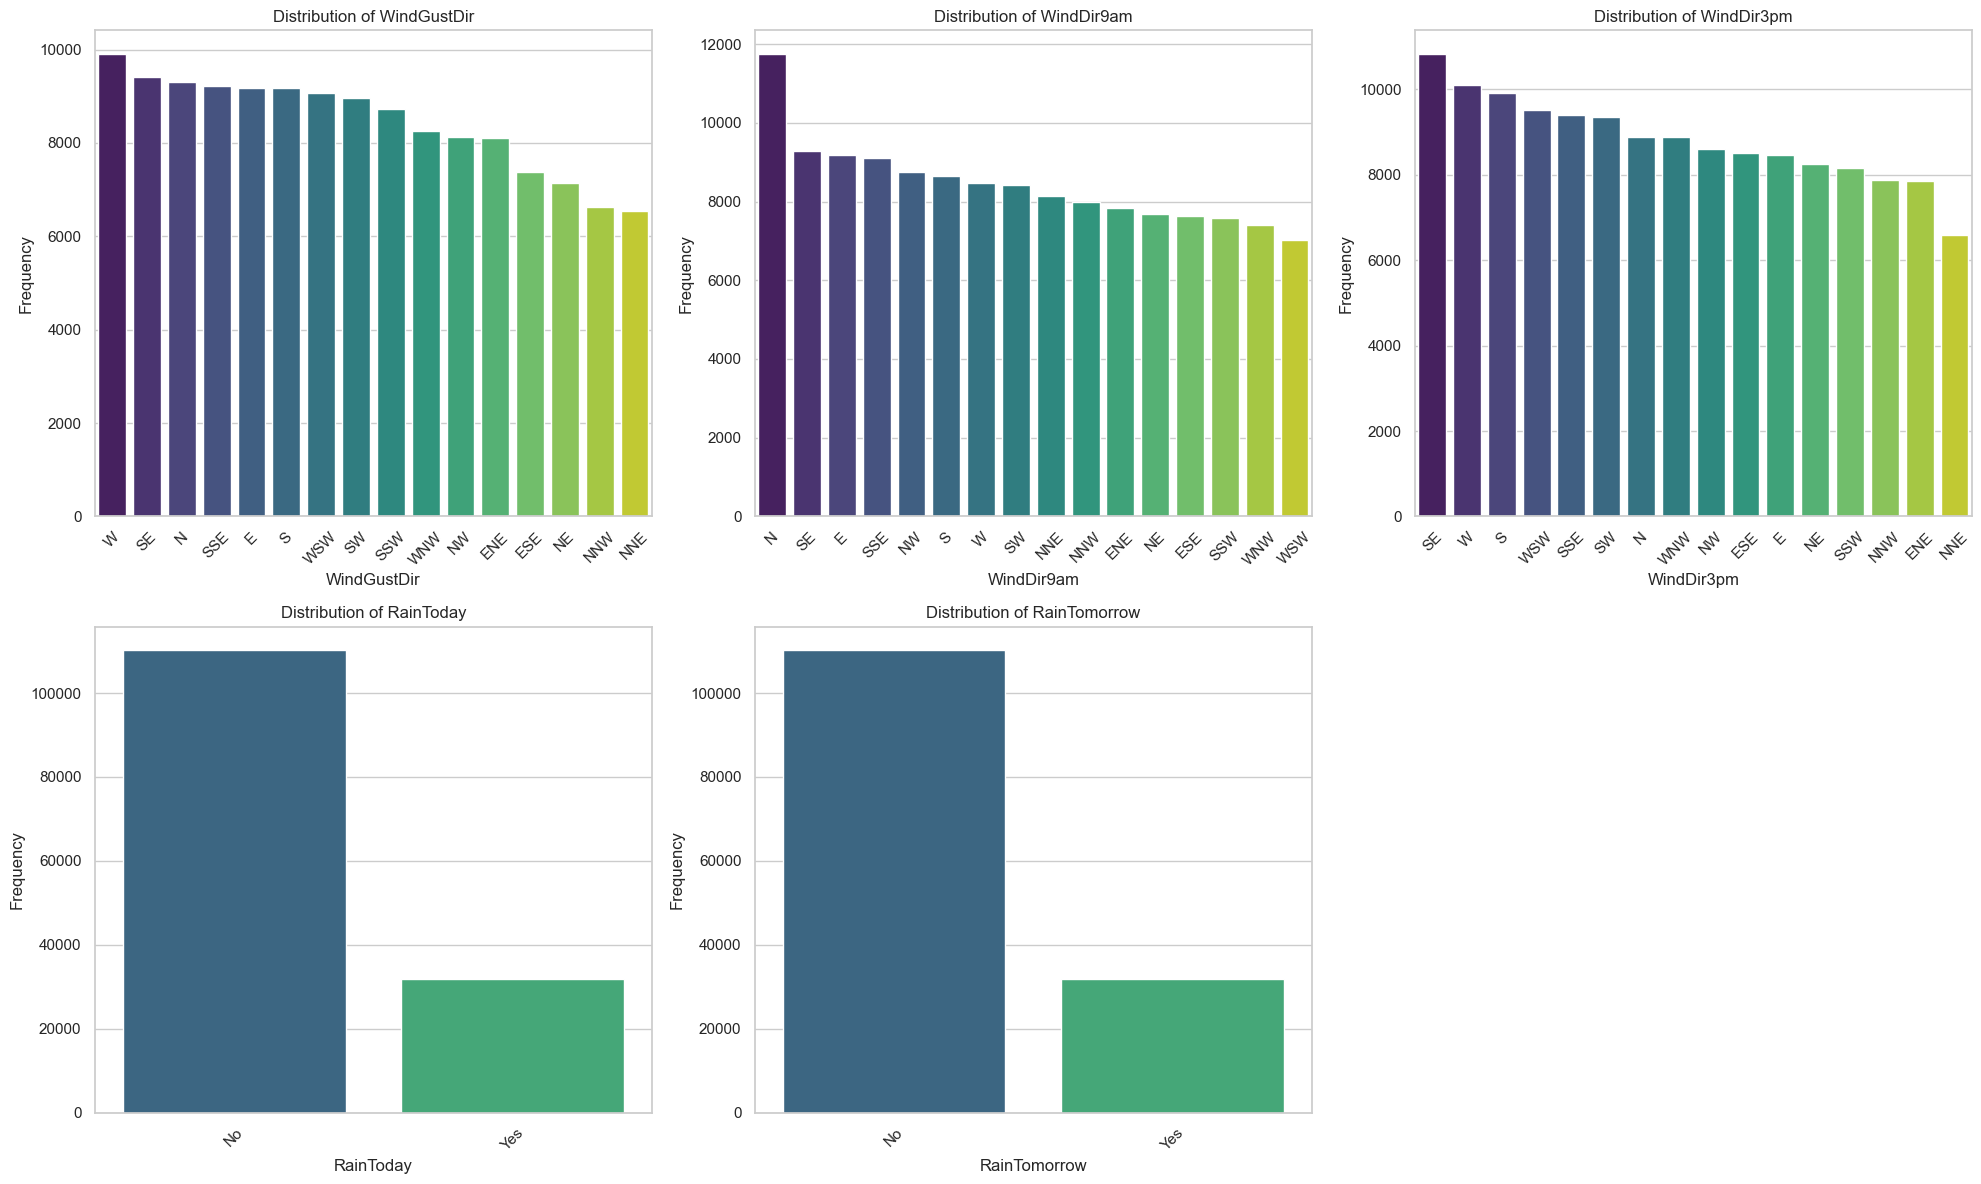

In [89]:
# Initialize the figure
plt.figure(figsize=(20, 12))

# Create a list of categorical columns to visualize
categorical_columns = ['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']

# Create subplots for each column
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(2, 3, i)
    sns.countplot(data=df, x=column, order=df[column].value_counts().index, palette='viridis')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()

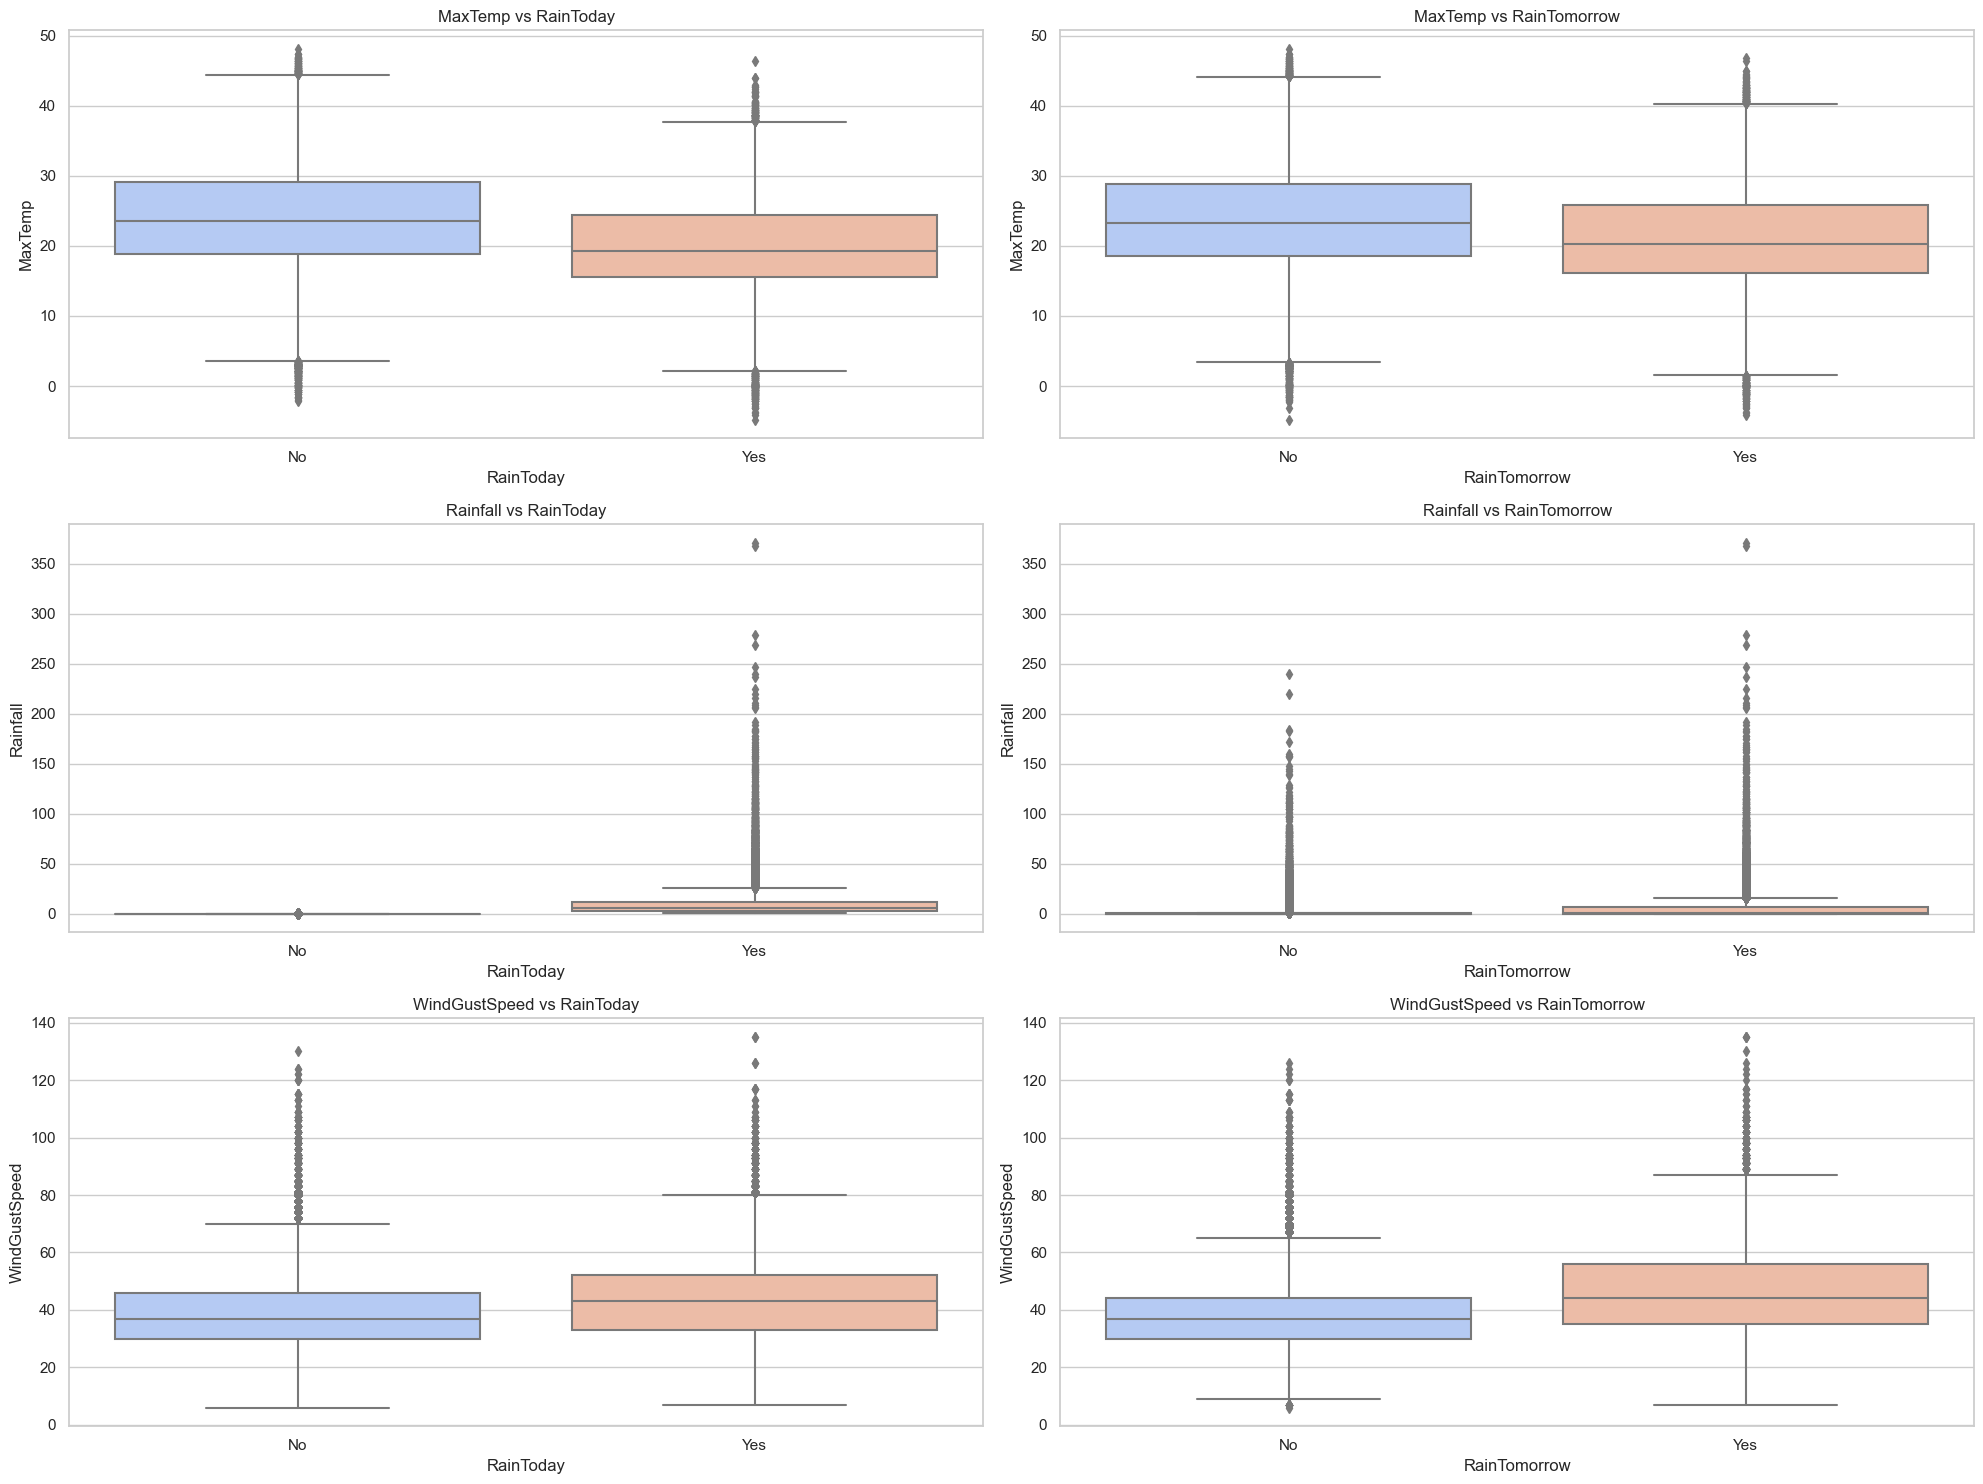

In [90]:
# Initialize the figure
plt.figure(figsize=(20, 15))

# List of numerical features to visualize
numerical_features_to_compare = ['MaxTemp', 'Rainfall', 'WindGustSpeed']

# Create subplots for each combination of numerical feature and categorical feature ('RainToday' and 'RainTomorrow')
for i, num_feature in enumerate(numerical_features_to_compare, 1):
    for j, cat_feature in enumerate(['RainToday', 'RainTomorrow'], 1):
        plt.subplot(3, 2, 2*(i-1) + j)
        sns.boxplot(data=df, x=cat_feature, y=num_feature, palette='coolwarm')
        plt.title(f'{num_feature} vs {cat_feature}')
        plt.xlabel(cat_feature)
        plt.ylabel(num_feature)

# Adjust layout
plt.tight_layout()
plt.show()


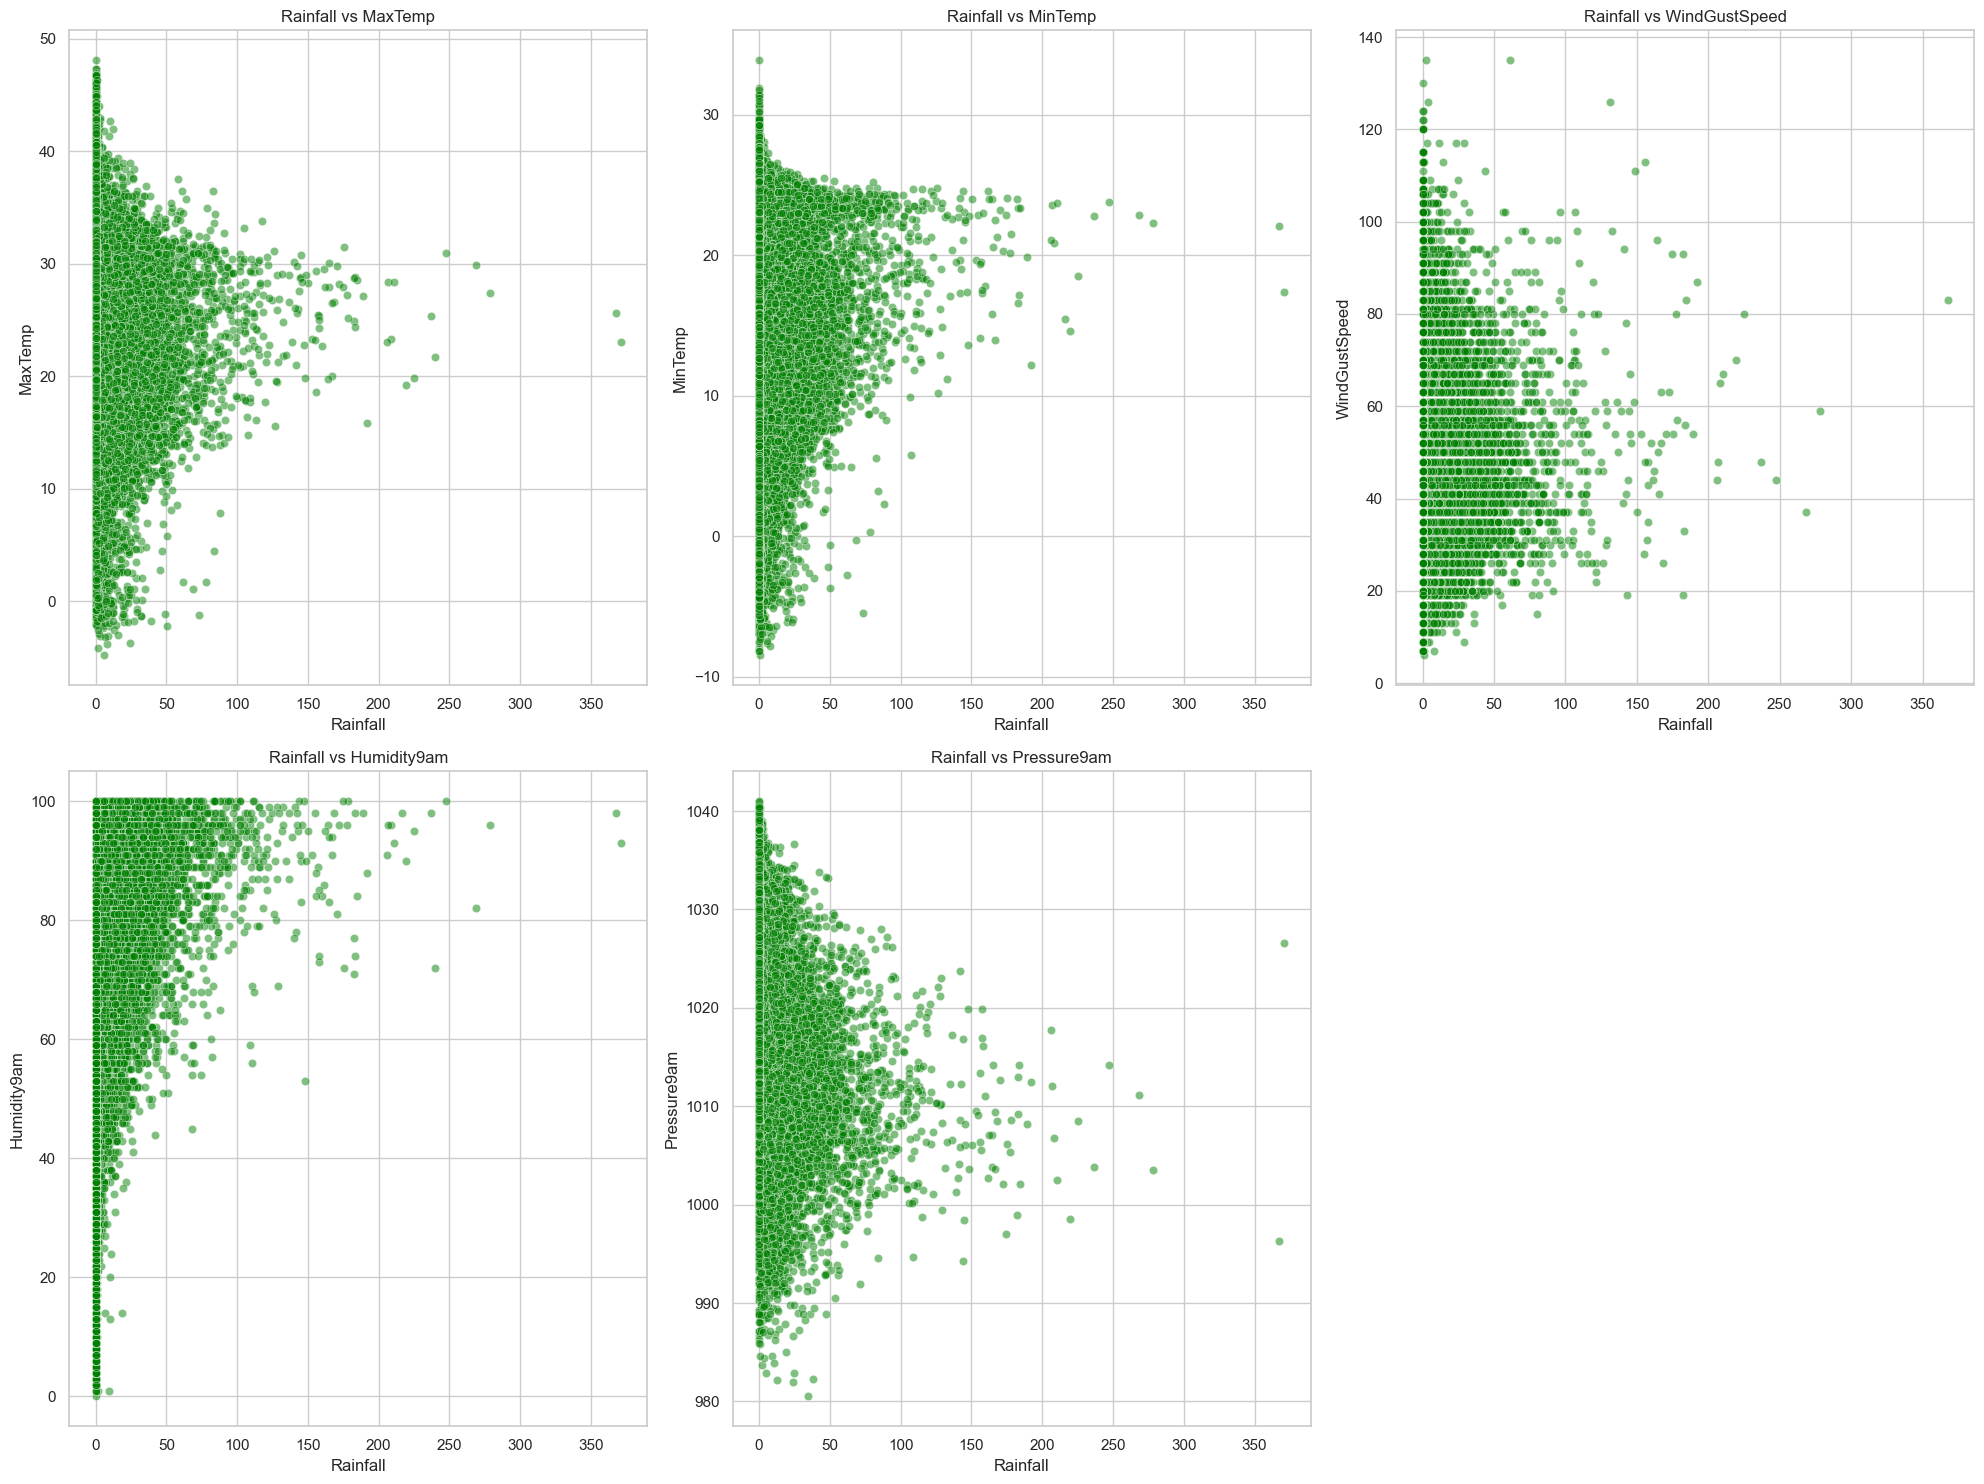

In [91]:
# Initialize the figure
plt.figure(figsize=(20, 15))

# List of numerical features to compare with 'Rainfall'
features_to_compare_with_rainfall = ['MaxTemp', 'MinTemp', 'WindGustSpeed', 'Humidity9am', 'Pressure9am']

# Create subplots for each feature to compare with 'Rainfall'
for i, feature in enumerate(features_to_compare_with_rainfall, 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(data=df, x='Rainfall', y=feature, alpha=0.5, color='green')
    plt.title(f'Rainfall vs {feature}')
    plt.xlabel('Rainfall')
    plt.ylabel(feature)

# Adjust layout
plt.tight_layout()
plt.show()

 # MODEL BUILDING

In [92]:
import pandas as pd
full_data = pd.read_csv('aus.csv')
full_data.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8         No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3         No   
2       1007.6       1008.7       NaN       2.0     21.0     23.2         No   
3       1017.6       1012.8       NaN       NaN     18.1     26.5         No   
4       1010.8       1006.0       7.0       8.0     17.8     29.7         No   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 23 columns]

In [93]:
full_data['Date'] = pd.to_datetime(full_data['Date'])
full_data['year'] = full_data['Date'].dt.year
full_data['month'] = full_data['Date'].dt.month
full_data['day'] = full_data['Date'].dt.day
full_data.drop(['Date'], axis = 1,inplace=True) 
full_data.head()

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  \
0   Albury     13.4     22.9       0.6          NaN       NaN           W   
1   Albury      7.4     25.1       0.0          NaN       NaN         WNW   
2   Albury     12.9     25.7       0.0          NaN       NaN         WSW   
3   Albury      9.2     28.0       0.0          NaN       NaN          NE   
4   Albury     17.5     32.3       1.0          NaN       NaN           W   

   WindGustSpeed WindDir9am WindDir3pm  ...  Pressure3pm  Cloud9am  Cloud3pm  \
0           44.0          W        WNW  ...       1007.1       8.0       NaN   
1           44.0        NNW        WSW  ...       1007.8       NaN       NaN   
2           46.0          W        WSW  ...       1008.7       NaN       2.0   
3           24.0         SE          E  ...       1012.8       NaN       NaN   
4           41.0        ENE         NW  ...       1006.0       7.0       8.0   

   Temp9am  Temp3pm  RainToday  RainTomorrow  year  month  day  
0     16.9     21.8         No            No  2008     12    1  
1     17.2     24.3         No            No  2008     12    2  
2     21.0     23.2         No            No  2008     12    3  
3     18.1     26.5         No            No  2008     12    4  
4     17.8     29.7         No            No  2008     12    5  

[5 rows x 25 columns]

In [94]:
full_data.shape

(145460, 25)

In [95]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 25 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       145460 non-null  object 
 1   MinTemp        143975 non-null  float64
 2   MaxTemp        144199 non-null  float64
 3   Rainfall       142199 non-null  float64
 4   Evaporation    82670 non-null   float64
 5   Sunshine       75625 non-null   float64
 6   WindGustDir    135134 non-null  object 
 7   WindGustSpeed  135197 non-null  float64
 8   WindDir9am     134894 non-null  object 
 9   WindDir3pm     141232 non-null  object 
 10  WindSpeed9am   143693 non-null  float64
 11  WindSpeed3pm   142398 non-null  float64
 12  Humidity9am    142806 non-null  float64
 13  Humidity3pm    140953 non-null  float64
 14  Pressure9am    130395 non-null  float64
 15  Pressure3pm    130432 non-null  float64
 16  Cloud9am       89572 non-null   float64
 17  Cloud3pm       86102 non-null

In [96]:
full_data['RainToday'].replace({'No': 0, 'Yes': 1},inplace = True)
full_data['RainTomorrow'].replace({'No': 0, 'Yes': 1},inplace = True)
full_data.head()

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  \
0   Albury     13.4     22.9       0.6          NaN       NaN           W   
1   Albury      7.4     25.1       0.0          NaN       NaN         WNW   
2   Albury     12.9     25.7       0.0          NaN       NaN         WSW   
3   Albury      9.2     28.0       0.0          NaN       NaN          NE   
4   Albury     17.5     32.3       1.0          NaN       NaN           W   

   WindGustSpeed WindDir9am WindDir3pm  ...  Pressure3pm  Cloud9am  Cloud3pm  \
0           44.0          W        WNW  ...       1007.1       8.0       NaN   
1           44.0        NNW        WSW  ...       1007.8       NaN       NaN   
2           46.0          W        WSW  ...       1008.7       NaN       2.0   
3           24.0         SE          E  ...       1012.8       NaN       NaN   
4           41.0        ENE         NW  ...       1006.0       7.0       8.0   

   Temp9am  Temp3pm  RainToday  RainTomorrow  year  month  day  
0     16.9     21.8        0.0           0.0  2008     12    1  
1     17.2     24.3        0.0           0.0  2008     12    2  
2     21.0     23.2        0.0           0.0  2008     12    3  
3     18.1     26.5        0.0           0.0  2008     12    4  
4     17.8     29.7        0.0           0.0  2008     12    5  

[5 rows x 25 columns]

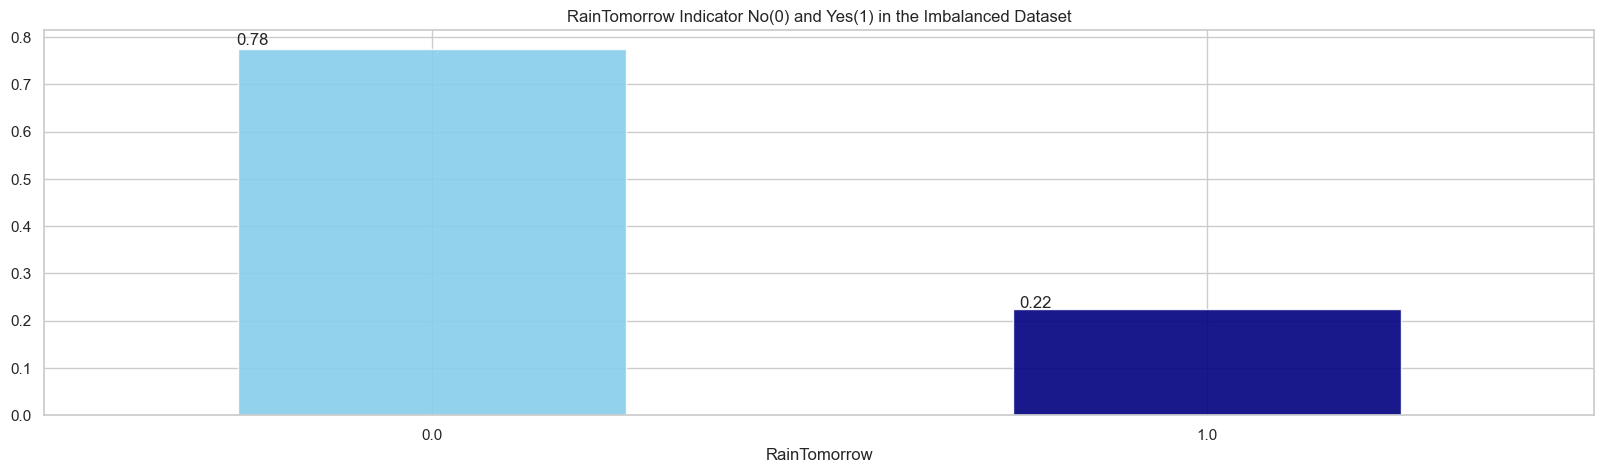

In [97]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (20,5))
ax=full_data.RainTomorrow.value_counts(normalize = True).plot(kind='bar', color= ['skyblue','navy'], alpha = 0.9, rot=0)
plt.title('RainTomorrow Indicator No(0) and Yes(1) in the Imbalanced Dataset')
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.show()

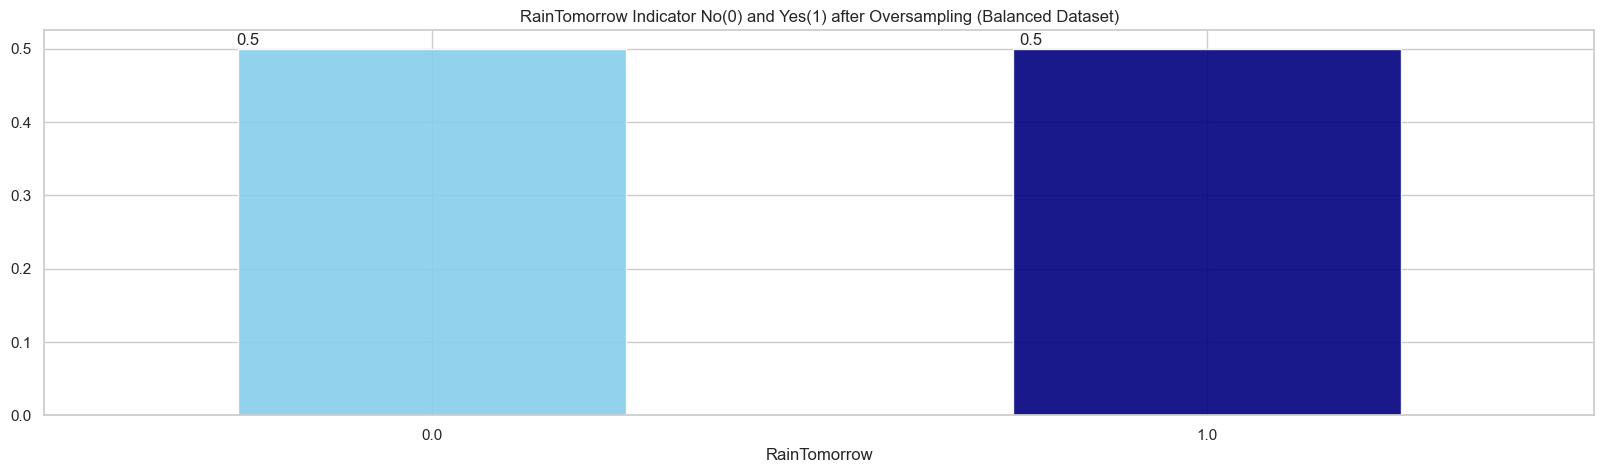

In [98]:
from sklearn.utils import resample

no = full_data[full_data.RainTomorrow == 0]
yes = full_data[full_data.RainTomorrow == 1]
yes_oversampled = resample(yes, replace=True, n_samples=len(no), random_state=42)
oversampled = pd.concat([no, yes_oversampled])

fig = plt.figure(figsize = (20,5))
ax=oversampled.RainTomorrow.value_counts(normalize = True).plot(kind='bar', color= ['skyblue','navy'], alpha = 0.9, rot=0)
plt.title('RainTomorrow Indicator No(0) and Yes(1) after Oversampling (Balanced Dataset)')
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.show()

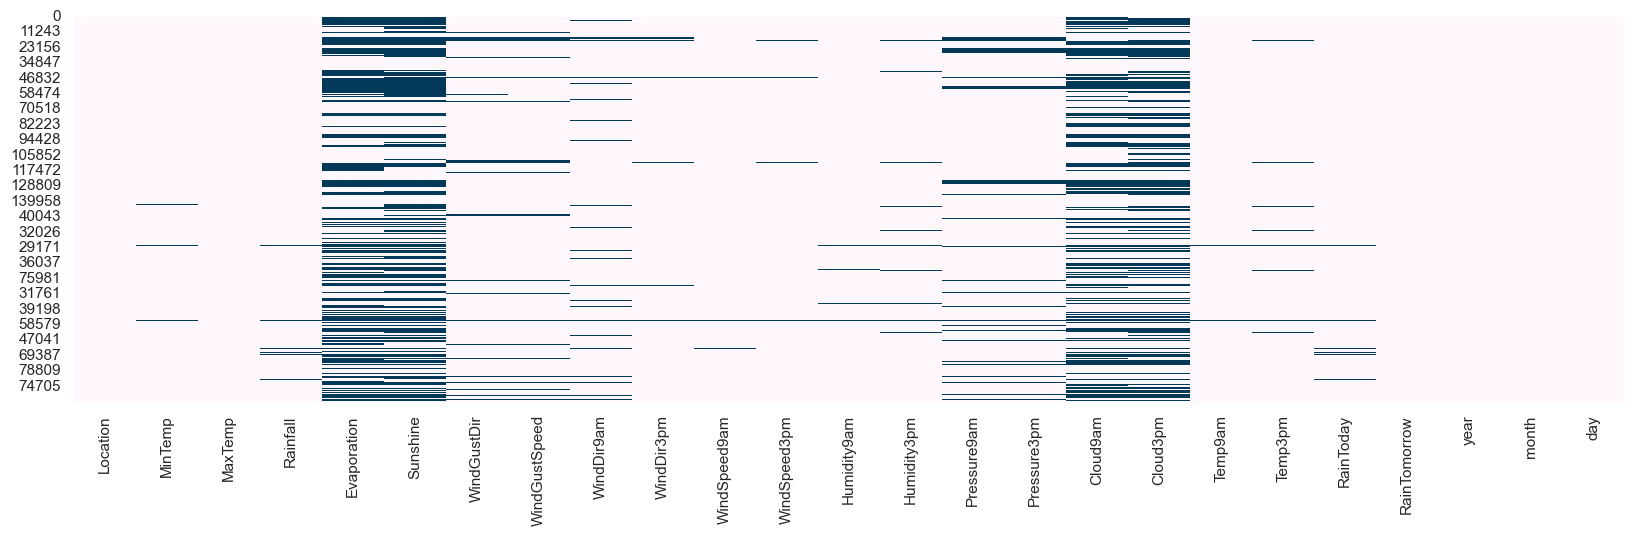

In [99]:
# Missing Data Pattern in Training Data
import seaborn as sns
plt.figure(figsize = (20,5))
sns.heatmap(oversampled.isnull(), cbar=False, cmap='PuBu')
plt.show()

In [100]:
total = oversampled.isnull().sum().sort_values(ascending=False)
percent = (oversampled.isnull().sum()/oversampled.isnull().count()).sort_values(ascending=False)
missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing.head()

Total   Percent
Sunshine     104711  0.474596
Evaporation   95325  0.432054
Cloud3pm      85658  0.388239
Cloud9am      81388  0.368886
Pressure9am   21620  0.097991

In [101]:
oversampled.select_dtypes(include=['object']).columns

Index(['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm'], dtype='object')

In [102]:
# Impute categorical var with Mode
oversampled['Location'] = oversampled['Location'].fillna(oversampled['Location'].mode()[0])
oversampled['WindGustDir'] = oversampled['WindGustDir'].fillna(oversampled['WindGustDir'].mode()[0])
oversampled['WindDir9am'] = oversampled['WindDir9am'].fillna(oversampled['WindDir9am'].mode()[0])
oversampled['WindDir3pm'] = oversampled['WindDir3pm'].fillna(oversampled['WindDir3pm'].mode()[0])

In [103]:
# Convert categorical features to continuous features with Label Encoding
from sklearn.preprocessing import LabelEncoder
lencoders = {}
for col in oversampled.select_dtypes(include=['object']).columns:
    lencoders[col] = LabelEncoder()
    oversampled[col] = lencoders[col].fit_transform(oversampled[col])

In [104]:
import warnings
warnings.filterwarnings("ignore")
# Multiple Imputation by Chained Equations
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
MiceImputed = oversampled.copy(deep=True) 
mice_imputer = IterativeImputer()
MiceImputed.iloc[:, :] = mice_imputer.fit_transform(oversampled)

In [105]:
# Detecting outliers with IQR
Q1 = MiceImputed.quantile(0.25)
Q3 = MiceImputed.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Location         25.000000
MinTemp           9.200000
MaxTemp          10.200000
Rainfall          2.400000
Evaporation       4.117610
Sunshine          5.961704
WindGustDir       9.000000
WindGustSpeed    19.000000
WindDir9am        8.000000
WindDir3pm        8.000000
WindSpeed9am     13.000000
WindSpeed3pm     11.000000
Humidity9am      26.000000
Humidity3pm      30.000000
Pressure9am       8.700000
Pressure3pm       8.863859
Cloud9am          4.000000
Cloud3pm          3.697490
Temp9am           9.300000
Temp3pm           9.800000
RainToday         1.000000
RainTomorrow      1.000000
year              5.000000
month             5.000000
day              15.000000
dtype: float64


In [106]:
# Removing outliers from the dataset
MiceImputed = MiceImputed[~((MiceImputed < (Q1 - 1.5 * IQR)) |(MiceImputed > (Q3 + 1.5 * IQR))).any(axis=1)]
MiceImputed.shape

(170401, 25)

In [107]:
MiceImputed.tail(5)

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
90843         14     15.3     22.1       0.4     4.773765  4.498654   
120324        32      7.1     20.0       6.0     1.800000  8.500000   
16816         24     13.6     32.0       0.0     6.286569  7.235859   
23840         27     12.8     18.6       0.0     6.407614  6.216829   
108762         1      9.5     21.3       4.4     3.400000  8.600000   

        WindGustDir  WindGustSpeed  WindDir9am  WindDir3pm  ...  Pressure3pm  \
90843            10      48.000000          10          10  ...  1028.200000   
120324            6      41.000000           5           6  ...  1015.400000   
16816            13      28.316295           4           4  ...  1010.845304   
23840             9      33.000000           9           2  ...  1021.700000   
108762           13      40.260922           3           3  ...  1007.100000   

        Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  RainTomorrow  year  \
90843   5.441771  6.692749     18.9     17.8        0.0           1.0  2010   
120324  2.000000  3.000000     11.1     18.8        1.0           1.0  2016   
16816   4.000000  6.000000     20.2     31.5        0.0           1.0  2013   
23840   6.000000  3.000000     17.0     16.8        0.0           1.0  2016   
108762  1.000000  4.000000     15.0     21.2        1.0           1.0  2009   

        month  day  
90843       7   27  
120324      8   16  
16816      12    4  
23840       9   11  
108762      6   10  

[5 rows x 25 columns]

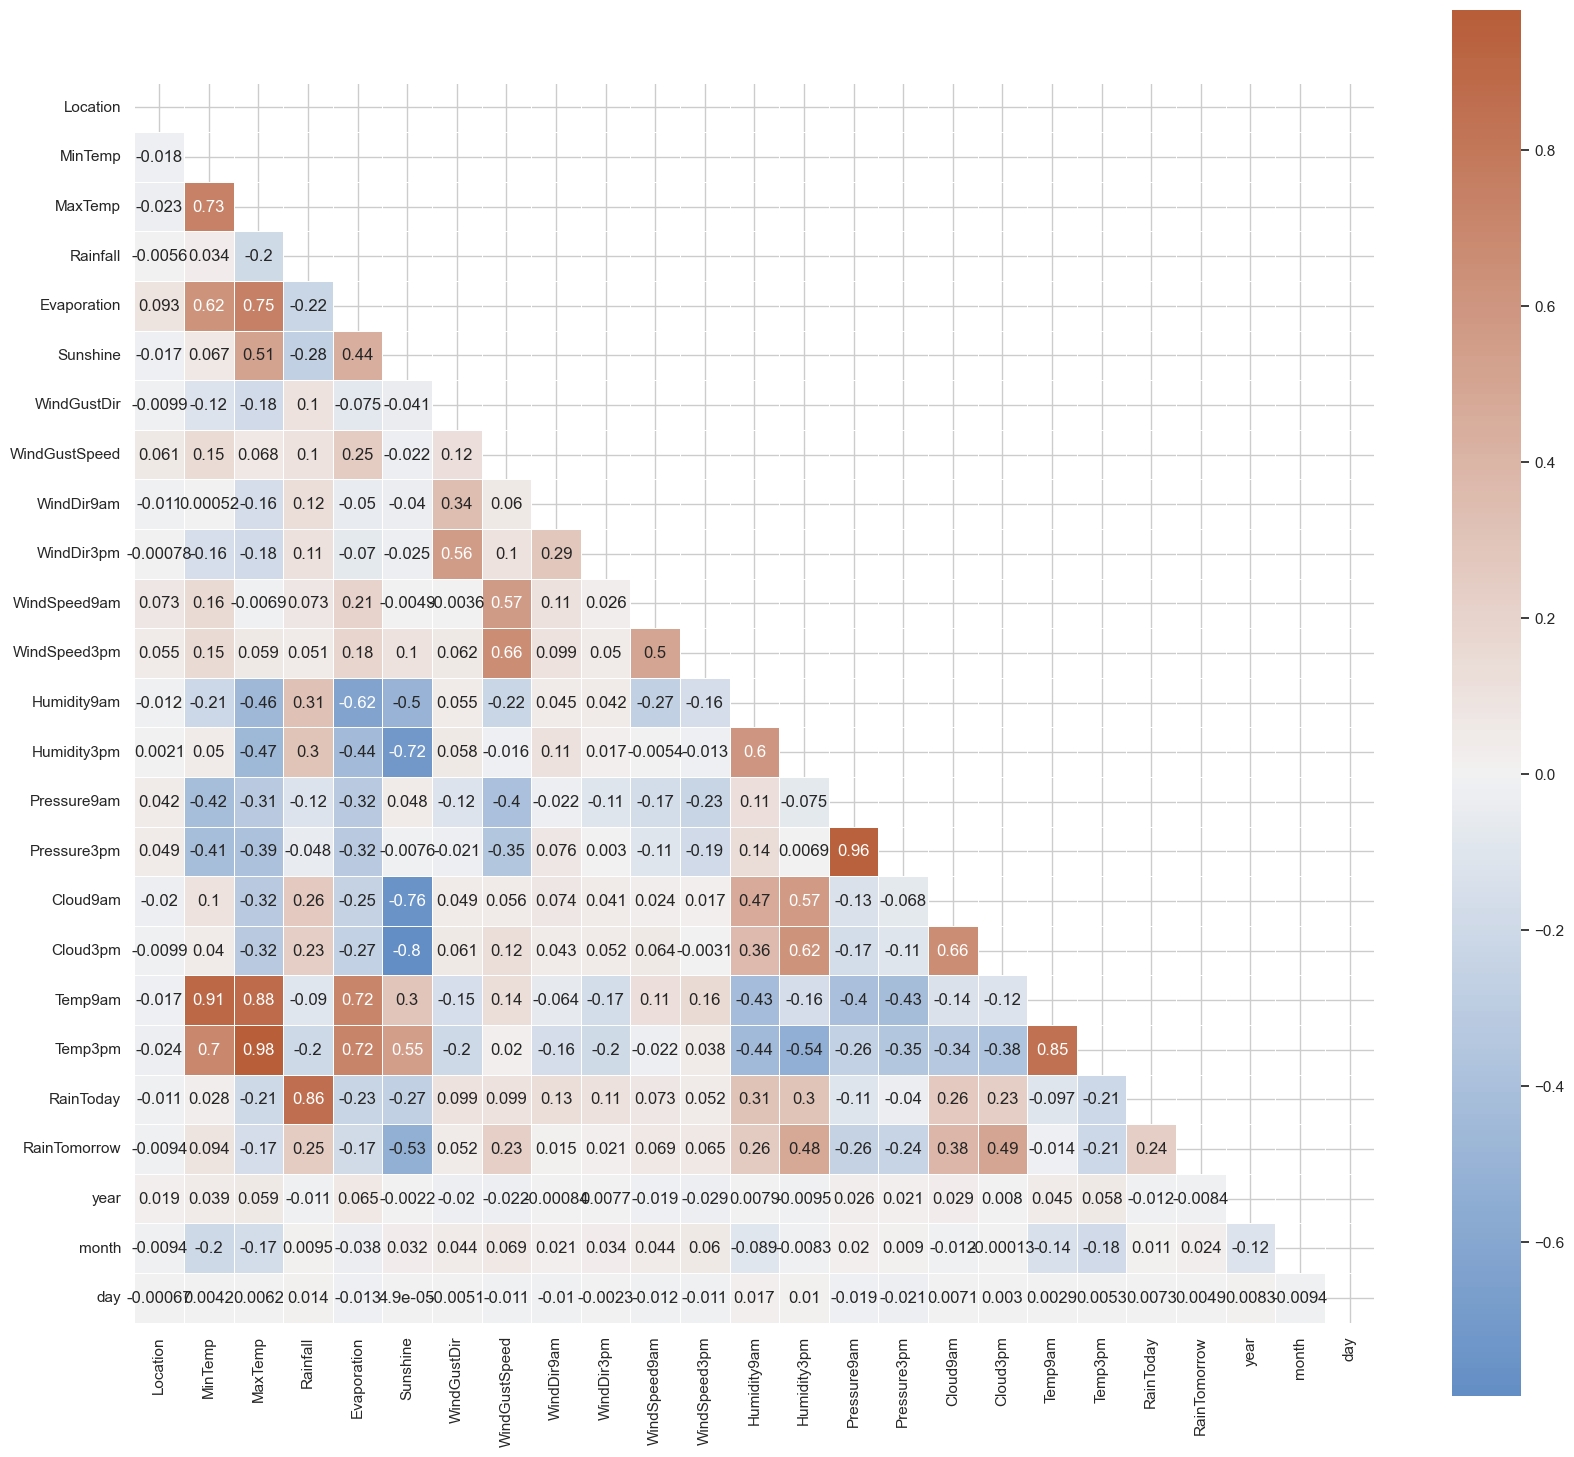

In [108]:
# Correlation Heatmap
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
corr = MiceImputed.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(20,20))
cmap = sns.diverging_palette(250, 25, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=None, center=0,square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .9})
plt.show()

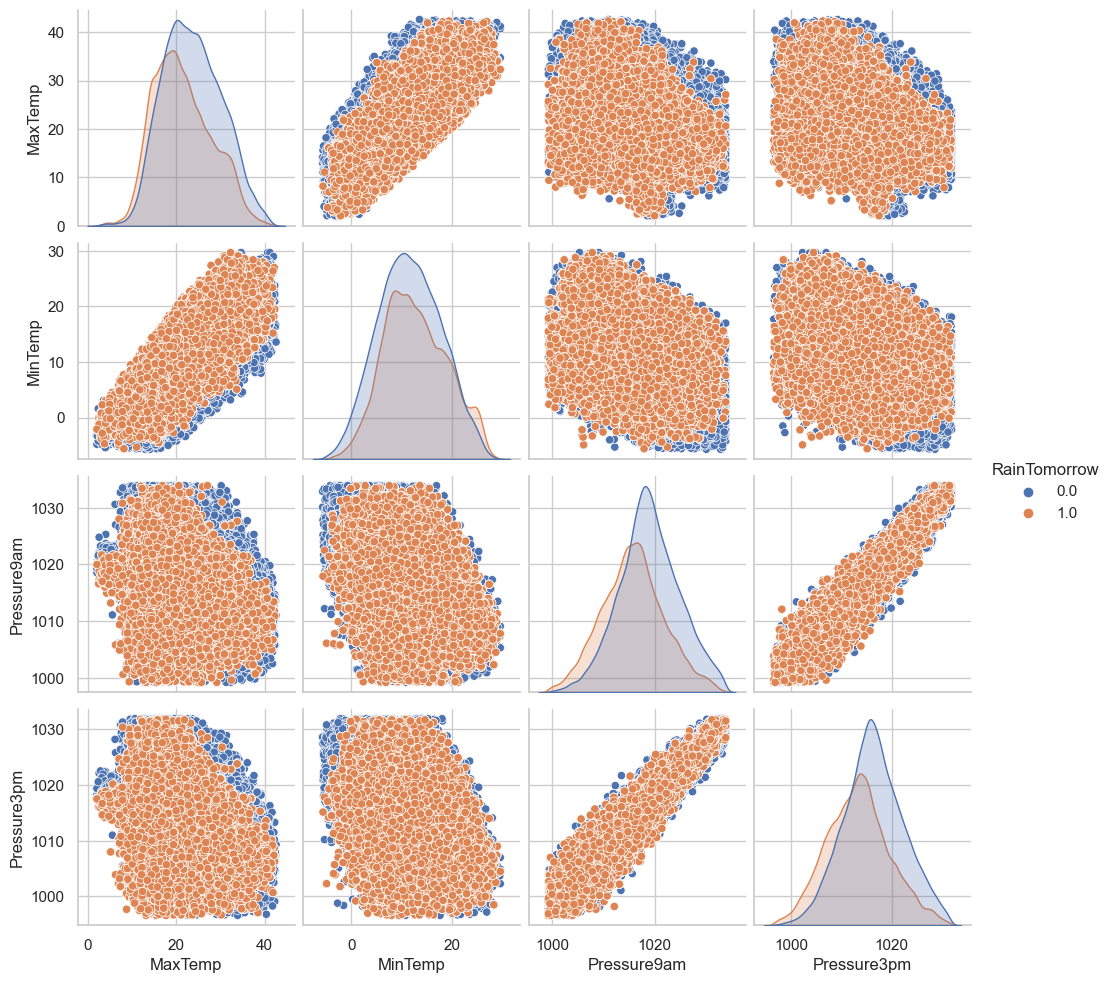

In [109]:
sns.pairplot( data=MiceImputed, vars=('MaxTemp','MinTemp','Pressure9am','Pressure3pm'), hue='RainTomorrow' )
plt.show()

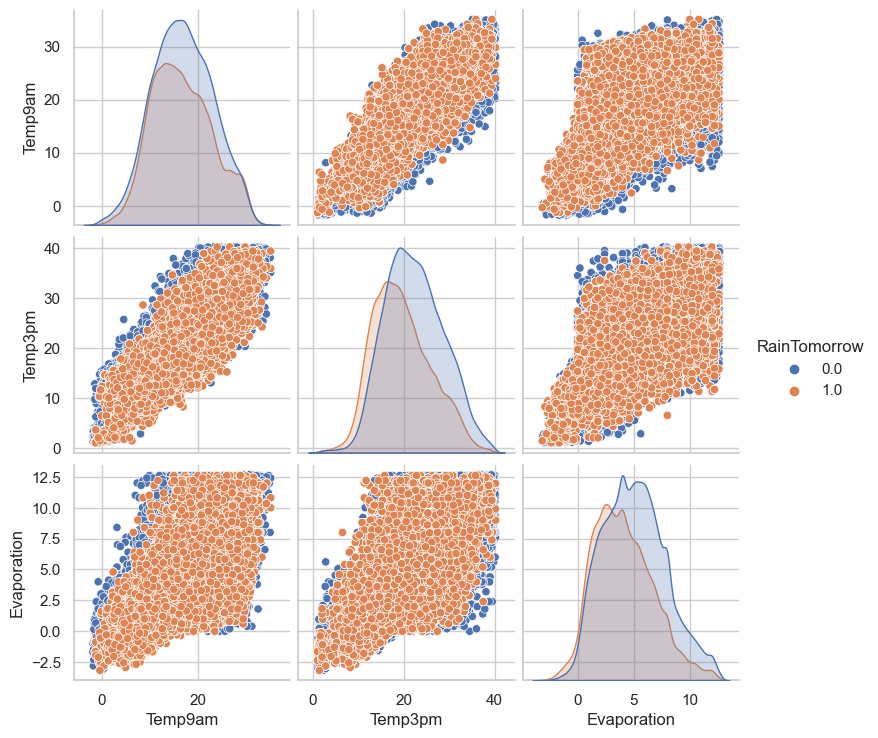

In [110]:
sns.pairplot( data=MiceImputed, vars=('Temp9am', 'Temp3pm', 'Evaporation'), hue='RainTomorrow' )
plt.show()

In [111]:
# Standardizing data
from sklearn import preprocessing
r_scaler = preprocessing.MinMaxScaler()
r_scaler.fit(MiceImputed)
modified_data = pd.DataFrame(r_scaler.transform(MiceImputed), index=MiceImputed.index, columns=MiceImputed.columns)

In [112]:
# Feature Importance using Filter Method (Chi-Square)
from sklearn.feature_selection import SelectKBest, chi2
X = modified_data.loc[:,modified_data.columns!='RainTomorrow']
y = modified_data[['RainTomorrow']]
selector = SelectKBest(chi2, k=10)
selector.fit(X, y)
X_new = selector.transform(X)
print(X.columns[selector.get_support(indices=True)])

Index(['Rainfall', 'Sunshine', 'WindGustSpeed', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'RainToday'],
      dtype='object')


In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier as rf

X = MiceImputed.drop('RainTomorrow', axis=1)
y = MiceImputed['RainTomorrow']
selector = SelectFromModel(rf(n_estimators=100, random_state=0))
selector.fit(X, y)
support = selector.get_support()
features = X.loc[:,support].columns.tolist()
print(features)
print(rf(n_estimators=100, random_state=0).fit(X,y).feature_importances_)

['Sunshine', 'WindGustSpeed', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm']


In [ ]:
features = MiceImputed[['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir', 
                       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 
                       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 
                       'RainToday']]
target = MiceImputed['RainTomorrow']

# Split into test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42,
                                                    shuffle=True, stratify=target)

# Normalize Features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [ ]:
def plot_roc_cur(fper, tper):  
    plt.plot(fper, tper, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [ ]:
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import (accuracy_score, roc_auc_score, cohen_kappa_score,
                             confusion_matrix, ConfusionMatrixDisplay, 
                             roc_curve, classification_report)

def plot_roc_cur(fper, tper):
    plt.plot(fper, tper, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

def run_model(model, X_train, y_train, X_test, y_test, verbose=True):
    t0 = time.time()
    
    if not verbose:
        model.fit(X_train, y_train, verbose=0)
    else:
        model.fit(X_train, y_train)
        
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    coh_kap = cohen_kappa_score(y_test, y_pred)
    
    time_taken = time.time() - t0
    
    print(f"Accuracy = {accuracy}")
    print(f"ROC Area under Curve = {roc_auc}")
    print(f"Cohen's Kappa = {coh_kap}")
    print(f"Time taken = {time_taken}")
    
    print(classification_report(y_test, y_pred, digits=5))
    
    # Plot ROC curve
    probs = model.predict_proba(X_test)
    probs = probs[:, 1]
    fper, tper, _ = roc_curve(y_test, probs)
    plot_roc_cur(fper, tper)
    
    # Compute and plot normalized confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    ConfusionMatrixDisplay(cm_normalized, display_labels=model.classes_).plot(cmap=plt.cm.Blues)
    
    return model, accuracy, roc_auc, coh_kap, time_taken


In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

params_lr = {'penalty': 'l1', 'solver':'liblinear'}

model_lr = LogisticRegression(**params_lr)
model_lr, accuracy_lr, roc_auc_lr, coh_kap_lr, tt_lr = run_model(model_lr, X_train, y_train, X_test, y_test)

In [ ]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

params_dt = {'max_depth': 16,
             'max_features': "sqrt"}

model_dt = DecisionTreeClassifier(**params_dt)
model_dt, accuracy_dt, roc_auc_dt, coh_kap_dt, tt_dt = run_model(model_dt, X_train, y_train, X_test, y_test)



In [ ]:
# Neural Network
from sklearn.neural_network import MLPClassifier

params_nn = {'hidden_layer_sizes': (30,30,30),
             'activation': 'logistic',
             'solver': 'lbfgs',
             'max_iter': 500}

model_nn = MLPClassifier(**params_nn)
model_nn, accuracy_nn, roc_auc_nn, coh_kap_nn, tt_nn = run_model(model_nn, X_train, y_train, X_test, y_test)

In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

params_rf = {'max_depth': 16,
             'min_samples_leaf': 1,
             'min_samples_split': 2,
             'n_estimators': 100,
             'random_state': 42}

model_rf = RandomForestClassifier(**params_rf)
model_rf, accuracy_rf, roc_auc_rf, coh_kap_rf, tt_rf = run_model(model_rf, X_train, y_train, X_test, y_test)

In [ ]:
# Light GBM
import lightgbm as lgb
params_lgb ={'colsample_bytree': 0.95, 
         'max_depth': 16, 
         'min_split_gain': 0.1, 
         'n_estimators': 200, 
         'num_leaves': 50, 
         'reg_alpha': 1.2, 
         'reg_lambda': 1.2, 
         'subsample': 0.95, 
         'subsample_freq': 20}

model_lgb = lgb.LGBMClassifier(**params_lgb)
model_lgb, accuracy_lgb, roc_auc_lgb, coh_kap_lgb, tt_lgb = run_model(model_lgb, X_train, y_train, X_test, y_test)


In [ ]:
# Catboost
import catboost as cb
params_cb ={'iterations': 50,
            'max_depth': 16}

model_cb = cb.CatBoostClassifier(**params_cb)
model_cb, accuracy_cb, roc_auc_cb, coh_kap_cb, tt_cb = run_model(model_cb, X_train, y_train, X_test, y_test, verbose=False)


In [ ]:
# XGBoost
import xgboost as xgb
params_xgb ={'n_estimators': 500,
            'max_depth': 16}

model_xgb = xgb.XGBClassifier(**params_xgb)
model_xgb, accuracy_xgb, roc_auc_xgb, coh_kap_xgb, tt_xgb = run_model(model_xgb, X_train, y_train, X_test, y_test)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import itertools
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
import catboost as cb
import xgboost as xgb
from mlxtend.classifier import EnsembleVoteClassifier
from mlxtend.plotting import plot_decision_regions

value = 1.80
width = 0.90

clf1 = LogisticRegression(random_state=42)
clf2 = DecisionTreeClassifier(random_state=42) 
clf3 = MLPClassifier(random_state=42, verbose = 0)
clf4 = RandomForestClassifier(random_state=42)
clf5 = lgb.LGBMClassifier(random_state=42, verbose = 0)
clf6 = cb.CatBoostClassifier(random_state=42, verbose = 0)
clf7 = xgb.XGBClassifier(random_state=42)
eclf = EnsembleVoteClassifier(clfs=[clf4, clf5, clf6, clf7], weights=[1, 1, 1, 1], voting='soft')

X_list = MiceImputed[["Sunshine", "Humidity9am", "Cloud3pm"]] #took only really important features
X = np.asarray(X_list, dtype=np.float32)
y_list = MiceImputed["RainTomorrow"]
y = np.asarray(y_list, dtype=np.int32)

# Plotting Decision Regions
gs = gridspec.GridSpec(3,3)
fig = plt.figure(figsize=(18, 14))

labels = ['Logistic Regression',
          'Decision Tree',
          'Neural Network',
          'Random Forest',
          'LightGBM',
          'CatBoost',
          'XGBoost',
          'Ensemble']

for clf, lab, grd in zip([clf1, clf2, clf3, clf4, clf5, clf6, clf7, eclf],
                         labels,
                         itertools.product([0, 1, 2],
                         repeat=2)):
    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=clf, 
                                filler_feature_values={2: value}, 
                                filler_feature_ranges={2: width}, 
                                legend=2)
    plt.title(lab)

plt.show()

In [ ]:
accuracy_scores = [accuracy_lr, accuracy_dt, accuracy_nn, accuracy_rf, accuracy_lgb, accuracy_cb, accuracy_xgb]
roc_auc_scores = [roc_auc_lr, roc_auc_dt, roc_auc_nn, roc_auc_rf, roc_auc_lgb, roc_auc_cb, roc_auc_xgb]
coh_kap_scores = [coh_kap_lr, coh_kap_dt, coh_kap_nn, coh_kap_rf, coh_kap_lgb, coh_kap_cb, coh_kap_xgb]
tt = [tt_lr, tt_dt, tt_nn, tt_rf, tt_lgb, tt_cb, tt_xgb]

model_data = {'Model': ['Logistic Regression','Decision Tree','Neural Network','Random Forest','LightGBM','Catboost','XGBoost'],
              'Accuracy': accuracy_scores,
              'ROC_AUC': roc_auc_scores,
              'Cohen_Kappa': coh_kap_scores,
              'Time taken': tt}
data = pd.DataFrame(model_data)

fig, ax1 = plt.subplots(figsize=(12,10))
ax1.set_title('Model Comparison: Accuracy and Time taken for execution', fontsize=13)
color = 'tab:green'
ax1.grid()
ax1.set_xlabel('Model', fontsize=13)
ax1.set_ylabel('Time taken', fontsize=13, color=color)
ax2 = sns.barplot(x='Model', y='Time taken', data = data, palette='summer')
ax1.tick_params(axis='y')
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Accuracy', fontsize=13, color=color)
ax2 = sns.lineplot(x='Model', y='Accuracy', data = data, sort=False, color=color)
ax2.tick_params(axis='y', color=color)

In [ ]:
fig, ax3 = plt.subplots(figsize=(12,10))
ax3.set_title('Model Comparison: Area under ROC and Cohens Kappa', fontsize=13)
color = 'tab:blue'
ax3.grid()
ax3.set_xlabel('Model', fontsize=13)
ax3.set_ylabel('ROC_AUC', fontsize=13, color=color)
ax4 = sns.barplot(x='Model', y='ROC_AUC', data = data, palette='winter')
ax3.tick_params(axis='y')
ax4 = ax3.twinx()
color = 'tab:red'
ax4.set_ylabel('Cohen_Kappa', fontsize=13, color=color)
ax4 = sns.lineplot(x='Model', y='Cohen_Kappa', data = data, sort=False, color=color)
ax4.tick_params(axis='y', color=color)
plt.show()

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, cohen_kappa_score
import xgboost as xgb
import catboost as cb
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier

# Initialize your previously trained models with their parameters
params_xgb = {'n_estimators': 500, 'max_depth': 16}
model_xgb = xgb.XGBClassifier(**params_xgb)

params_cb = {'iterations': 50, 'max_depth': 16}
model_cb = cb.CatBoostClassifier(**params_cb)

params_nn = {'hidden_layer_sizes': (30,30,30), 'activation': 'logistic', 'solver': 'lbfgs', 'max_iter': 500}
model_nn = MLPClassifier(**params_nn)

params_rf = {'max_depth': 16, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100, 'random_state': 42}
model_rf = RandomForestClassifier(**params_rf)

# Fit each model on the training data
model_xgb.fit(X_train, y_train)
model_cb.fit(X_train, y_train)
model_nn.fit(X_train, y_train)
model_rf.fit(X_train, y_train)

# Create an ensemble of the models using soft voting
ensemble_model = VotingClassifier(estimators=[
        ('xgb', model_xgb),
        ('cb', model_cb),
        ('nn', model_nn),
        ('rf', model_rf)],
        voting='soft')

# Fit ensemble model on training data
ensemble_model.fit(X_train, y_train)

# Evaluate ensemble model on test data
y_pred_ensemble = ensemble_model.predict(X_test)
ensemble_accuracy = accuracy_score(y_test, y_pred_ensemble)
ensemble_roc_auc = roc_auc_score(y_test, y_pred_ensemble)
ensemble_coh_kap = cohen_kappa_score(y_test, y_pred_ensemble)

print(f"Ensemble Model Accuracy: {ensemble_accuracy}")
print(f"Ensemble Model ROC AUC: {ensemble_roc_auc}")
print(f"Ensemble Model Cohen's Kappa: {ensemble_coh_kap}")

# You can now compare these metrics with those of the individual models to evaluate the performance


In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Evaluate ensemble model on test data to get predicted probabilities
y_pred_probs_ensemble = ensemble_model.predict_proba(X_test)[:, 1]  # probabilities for the positive outcome

# Compute ROC curve and ROC area for the ensemble model
fpr_ensemble, tpr_ensemble, _ = roc_curve(y_test, y_pred_probs_ensemble)
roc_auc_ensemble = auc(fpr_ensemble, tpr_ensemble)

# Plot ROC curve
plt.figure()
lw = 2  # line width
plt.plot(fpr_ensemble, tpr_ensemble, color='darkorange',
         lw=lw, label=f'Ensemble ROC curve (area = {roc_auc_ensemble:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


In [ ]:
model_ens

In [ ]:
accuracy_ensemble = accuracy_score(y_test, y_pred_ensemble)
print(f"Ensemble model accuracy: {accuracy_ensemble:.2f}")